# MECANISMO CINCO BARRAS

## ANIMACIÓN

In [1]:
#! /usr/bin/env python

import numpy as np
import math as math
import array as arr
import pprint  # para depurar
import matplotlib.pyplot as plt  #Para graficas
import matplotlib.animation as animation
import scipy.integrate as integrate 
import os
from time import sleep
#%matplotlib inline (Para notebook)



print ('MECANISMO DE CINCO BARRAS')
print ('=============================')
# Lectura de datos por teclado

meca = {} # dictionary vacio, con propiedades de mecanismo

meca["L1"] = float (input ('Introduce longitud L1:'))
meca["L2"] = float (input ('Introduce longitud L2:'))
meca["L3"] = float (input ('Introduce longitud L3:'))
meca["L4"] = float (input ('Introduce longitud L4: '))
meca["theta"] = float (input ('Introduce angulo inicial theta:')) #En rad
meca["beta"] = float (input('Introduce angulo inicial beta: ')) #En rad
meca["XB"] = float (input ('Introduce coordenada en x del punto B:'))
meca["XA"] = 0
meca["YA"] = 0
meca["YB"] = 0

# Defino posicion inicial:
q = np.array ([[0.1], [meca["L1"]], [1], [0.2], [meca["XB"]+meca["L4"]], [0.1], [meca["theta"]], [meca["beta"]]])
print('q: ' + str(q))

# JACOBIANO
def jacob_Phiq(q,meca):
    #Inicializa a cero la matriz jacobiana
    Jacob = np.zeros((8,8))

    #Extraer coordenadas

    X1 = q[0]
    Y1 = q[1]
    X2 = q[2]
    Y2 = q[3]
    X3 = q[4]
    Y3 = q[5]
    theta = q[6]
    beta = q[7]

    #Montar matriz

    Jacob[0,0] = 2*X1
    Jacob[0,1] = 2*Y1
    Jacob[1,0] = -2*(X2-X1)
    Jacob[1,1] = -2*(Y2-Y1)
    Jacob[1,2] = 2*(X2-X1)
    Jacob[1,3] = 2*(Y2-Y1)
    Jacob[2,2] = -2*(X3-X2)
    Jacob[2,3] = -2*(Y3-Y2)
    Jacob[2,4] = 2*(X3-X2)
    Jacob[2,5] = 2*(Y3-Y2)
    Jacob[3,4] = -2*(meca["XB"]-X3)
    Jacob[3,5] = -2*(meca["YB"]-Y3)

    if (abs(math.cos(theta)) < 0.95 ):
        Jacob[4,6] = meca["L1"]*math.sin(theta)
        Jacob[4,0] = 1
    else:
        Jacob[4,6] = -meca["L1"]*math.cos(theta)
        Jacob[4,1] = 1


    if (abs(math.cos(beta)) < 0.95 ):
        Jacob[5,7] = meca["L4"]*math.sin(beta)
        Jacob[5,4] = 1
    else:
        Jacob[5,7] = -meca["L4"]*math.cos(beta)
        Jacob[5,5] = 1

    Jacob[6,6] = 1
    Jacob[7,7] = 1

    return Jacob


def Phi (q,meca):
    #Inicializa a cero Phi
    Phi = np.zeros((8,1))

    #Extraer coordenadas
    X1 = q[0]
    Y1 = q[1]
    X2 = q[2]
    Y2 = q[3]
    X3 = q[4]
    Y3 = q[5]
    theta = q[6]
    beta = q[7]

    Phi[0] = X1**2 + Y1**2 - meca["L1"]**2
    Phi[1] = (X2-X1)**2 + (Y2-Y1)**2 -meca["L2"]**2
    Phi[2] = (X3-X2)**2 + (Y3-Y2)**2 - meca["L3"]**2
    Phi[3] = (meca["XB"] - X3)**2 + (meca["YB"] - Y3)**2 - meca["L4"]**2

    if (abs(math.cos(theta)) < 0.95 ):
        Phi[4] = X1-meca["L1"]*math.cos(theta)
    else: 
        Phi[4] = Y1-meca["L1"]*math.sin(theta)

    if (abs(math.cos(beta)) < 0.95 ):
        Phi[5] = (X3-meca["XB"])-meca["L4"]*math.cos(beta)
    else: 
        Phi[5] = Y3-meca["L4"]*math.sin(beta)

    return Phi



def resuelve_prob_posicion(q_init, meca):
    #Inicializacion de variables
    error = 1e10
    tolerancia = 1e-10

    #Inicializacion en cero de deltaQ, fi y q
    deltaQ = np.zeros ((8,1))
    q = q_init
    i=0

    # Iteraciones hasta conseguir que el error sea menor que la tolerancia

    while (error > tolerancia and i<=100):
        #print("q=")
        #pprint.pprint(q)


        #Extraer las coordenadas
        X1 = q[0]
        Y1 = q[1]
        X2 = q[2]
        Y2 = q[3]
        X3 = q[4]
        Y3 = q[5]
        theta = q[6]
        beta = q[7]
       
        fi=Phi(q,meca)

        J = jacob_Phiq(q,meca)

        
        deltaQ = np.linalg.solve(J,-fi)
        q = q + deltaQ
        error = np.linalg.norm(deltaQ)  # El error es el modulo del vector
        i=i+1
        
    if (error > tolerancia):
        raise Exception ('No se puede alcanzar la posición')


    return q


def dibuja_mecanismo(q, meca):


    # Extraer los puntos moviles del mecanismo
    X1 = q[0]
    Y1 = q[1]
    X2 = q[2]
    Y2 = q[3]
    X3 = q[4]
    Y3 = q[5]
    theta = q[6]
    beta = q[7]
    
	
    plt.axis('equal')
    
    
    plt.plot ([meca["XA"], X1], [meca["YA"], Y1])    #[pos inicial (x1,x2), pos final (y1,y2)]
    plt.plot ([X1, X2], [Y1, Y2])  
    plt.plot ([X2, X3], [Y2, Y3])  
    plt.plot([X3,meca["XB"]], [Y3, meca["YB"]])

    plt.plot(meca["XA"], meca["YA"], 'bo')  
    plt.plot(meca["XB"], meca["YB"], 'go')

    plt.show()#block=False) 
    return






MECANISMO DE CINCO BARRAS
Introduce longitud L1:1
Introduce longitud L2:3
Introduce longitud L3:3
Introduce longitud L4: 1
Introduce angulo inicial theta:0
Introduce angulo inicial beta: 0
Introduce coordenada en x del punto B:3
q: [[0.1]
 [1. ]
 [1. ]
 [0.2]
 [4. ]
 [0.1]
 [0. ]
 [0. ]]


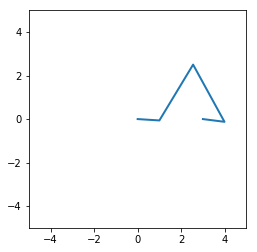

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

fig, ax = plt.subplots()

ax.set_xlim(( -5, 5))
ax.set_ylim((-5,5))
ax.set_aspect('equal')

line, = ax.plot([], [], lw=2)

last_q = q

def init():
    line.set_data([], [])
    return (line,)

def animate(i,q,meca):
    global last_q
    q = last_q
    # i: contador de iteracion: hay que mapearla a un ángulo de la manivela
    omega=2*3.14159/100  # vel. angular
    q[6] = i*omega
    q[7] = i*omega*2

    #llamar problema de pos:    
    q = resuelve_prob_posicion(q, meca)
    last_q = q
    
    # Extraer los puntos moviles del mecanismo
    X1 = q[0]
    Y1 = q[1]
    X2 = q[2]
    Y2 = q[3]
    X3 = q[4]
    Y3 = q[5]
    theta = q[6]
    beta = q[7]
        
    x=[meca["XA"], X1, X2, X3, meca["XB"]]
    y=[meca["YA"], Y1, Y2, Y3, meca["YB"]]
  
    
    line.set_data(x, y)
    return (line,)


anim = animation.FuncAnimation(fig, animate, init_func=init, fargs=(q,meca),
                               frames=100, interval=20, 
                               blit=True)

HTML(anim.to_html5_video())


q
array([[ 1.00000000e+00],
       [-9.18354962e-41],
       [ 2.50000000e+00],
       [ 2.59807621e+00],
       [ 4.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00]])


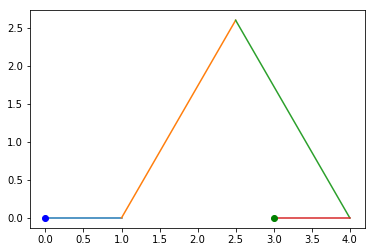

q
array([[0.9961947 ],
       [0.08715567],
       [2.4961947 ],
       [2.68523188],
       [3.9961947 ],
       [0.08715567],
       [0.08726639],
       [0.08726639]])


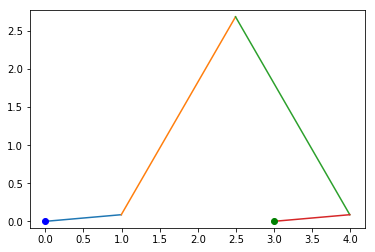

q
array([[0.98480778],
       [0.17364803],
       [2.48480778],
       [2.77172424],
       [3.98480778],
       [0.17364803],
       [0.17453278],
       [0.17453278]])


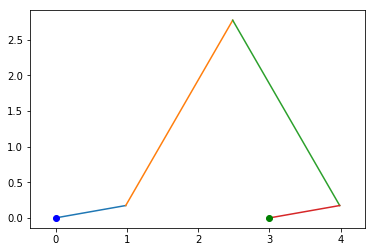

q
array([[0.96592588],
       [0.25881883],
       [2.46592588],
       [2.85689504],
       [3.96592588],
       [0.25881883],
       [0.26179917],
       [0.26179917]])


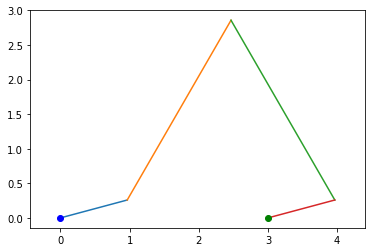

q
array([[0.93969272],
       [0.34201987],
       [2.43969272],
       [2.94009608],
       [3.93969272],
       [0.34201987],
       [0.34906556],
       [0.34906556]])


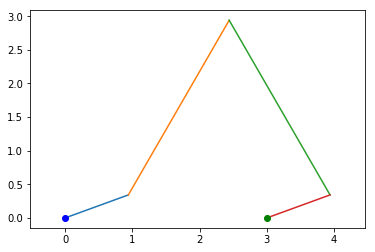

q
array([[0.90630794],
       [0.42261793],
       [2.40630794],
       [3.02069414],
       [3.90630794],
       [0.42261793],
       [0.43633194],
       [0.43633194]])


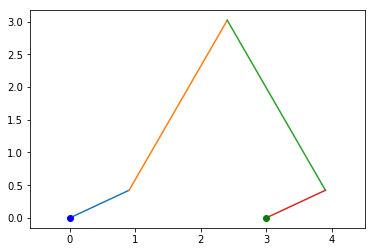

q
array([[0.86602562],
       [0.49999962],
       [2.36602562],
       [3.09807583],
       [3.86602562],
       [0.49999962],
       [0.52359833],
       [0.52359833]])


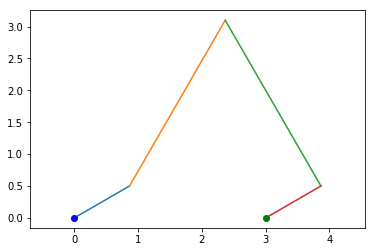

q
array([[0.81915234],
       [0.57357601],
       [2.31915234],
       [3.17165223],
       [3.81915234],
       [0.57357601],
       [0.61086472],
       [0.61086472]])


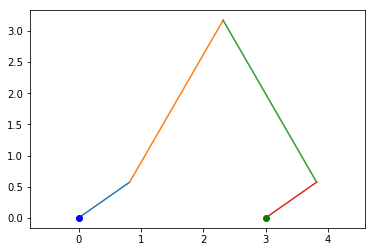

q
array([[0.76604482],
       [0.64278716],
       [2.26604482],
       [3.24086337],
       [3.76604482],
       [0.64278716],
       [0.69813111],
       [0.69813111]])


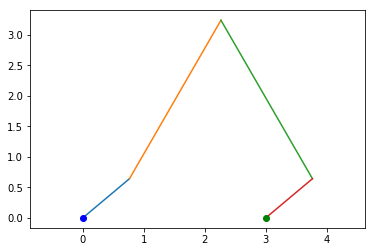

q
array([[0.70710725],
       [0.70710631],
       [2.20710725],
       [3.30518252],
       [3.70710725],
       [0.70710631],
       [0.7853975 ],
       [0.7853975 ]])


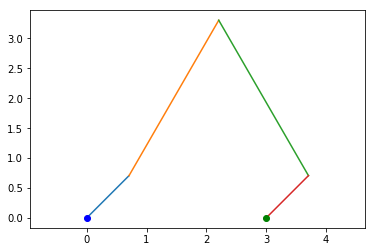

q
array([[0.64278817],
       [0.76604397],
       [2.14278817],
       [3.36412018],
       [3.64278817],
       [0.76604397],
       [0.87266389],
       [0.87266389]])


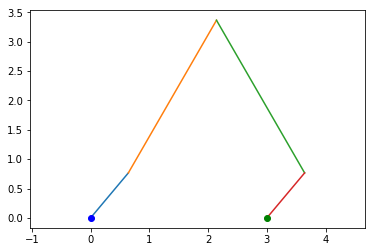

q
array([[0.5735771 ],
       [0.81915158],
       [2.0735771 ],
       [3.41722779],
       [3.5735771 ],
       [0.81915158],
       [0.95993028],
       [0.95993028]])


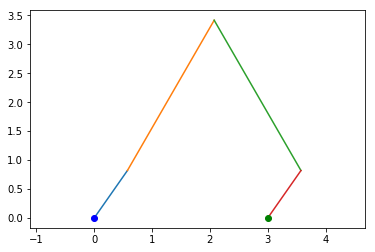

q
array([[0.50000077],
       [0.86602496],
       [2.00000077],
       [3.46410117],
       [3.50000077],
       [0.86602496],
       [1.04719667],
       [1.04719667]])


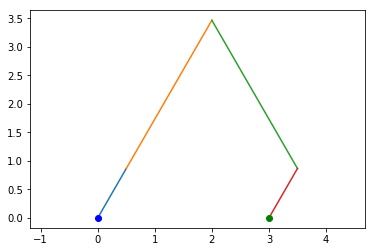

q
array([[0.42261913],
       [0.90630738],
       [1.92261913],
       [3.50438359],
       [3.42261913],
       [0.90630738],
       [1.13446306],
       [1.13446306]])


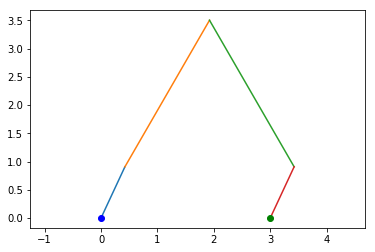

q
array([[0.34202111],
       [0.93969227],
       [1.84202111],
       [3.53776848],
       [3.34202111],
       [0.93969227],
       [1.22172944],
       [1.22172944]])


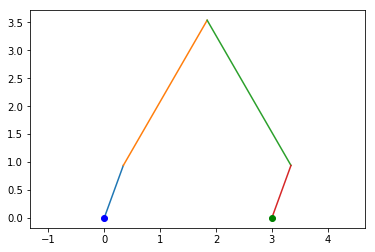

q
array([[0.25882011],
       [0.96592554],
       [1.75882011],
       [3.56400175],
       [3.25882011],
       [0.96592554],
       [1.30899583],
       [1.30899583]])


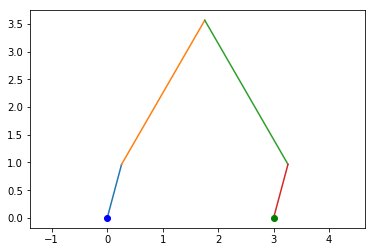

q
array([[0.17364934],
       [0.98480755],
       [1.67364934],
       [3.58288376],
       [3.17364934],
       [0.98480755],
       [1.39626222],
       [1.39626222]])


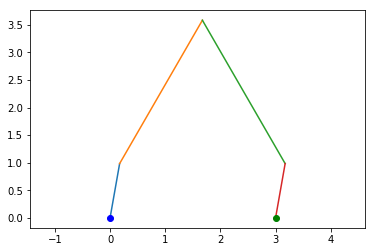

q
array([[0.08715699],
       [0.99619459],
       [1.58715699],
       [3.5942708 ],
       [3.08715699],
       [0.99619459],
       [1.48352861],
       [1.48352861]])


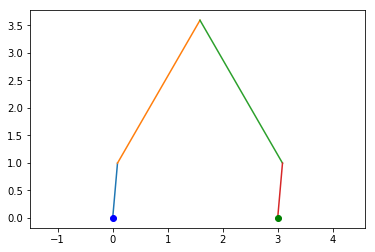

q
array([[1.32679490e-06],
       [1.00000000e+00],
       [1.50000133e+00],
       [3.59807621e+00],
       [3.00000133e+00],
       [1.00000000e+00],
       [1.57079500e+00],
       [1.57079500e+00]])


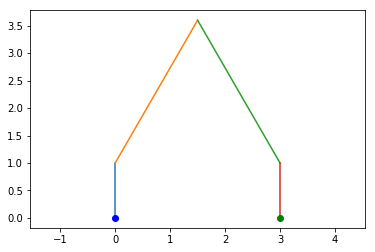

q
array([[-0.08715435],
       [ 0.99619482],
       [ 1.41284565],
       [ 3.59427103],
       [ 2.91284565],
       [ 0.99619482],
       [ 1.65806139],
       [ 1.65806139]])


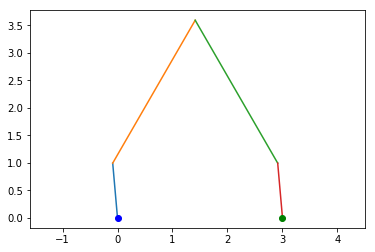

q
array([[-0.17364673],
       [ 0.98480801],
       [ 1.32635327],
       [ 3.58288422],
       [ 2.82635327],
       [ 0.98480801],
       [ 1.74532778],
       [ 1.74532778]])


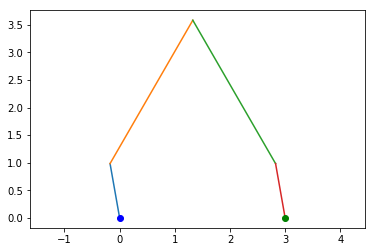

q
array([[-0.25881755],
       [ 0.96592623],
       [ 1.24118245],
       [ 3.56400244],
       [ 2.74118245],
       [ 0.96592623],
       [ 1.83259417],
       [ 1.83259417]])


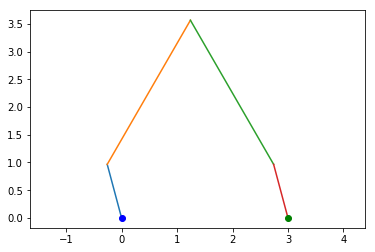

q
array([[-0.34201862],
       [ 0.93969318],
       [ 1.15798138],
       [ 3.53776939],
       [ 2.65798138],
       [ 0.93969318],
       [ 1.91986056],
       [ 1.91986056]])


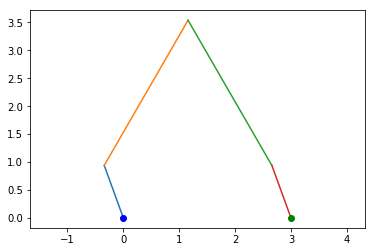

q
array([[-0.42261673],
       [ 0.9063085 ],
       [ 1.07738327],
       [ 3.50438471],
       [ 2.57738327],
       [ 0.9063085 ],
       [ 2.00712694],
       [ 2.00712694]])


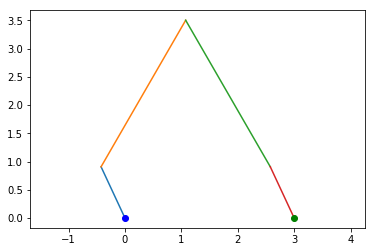

q
array([[-0.49999847],
       [ 0.86602629],
       [ 1.00000153],
       [ 3.4641025 ],
       [ 2.50000153],
       [ 0.86602629],
       [ 2.09439333],
       [ 2.09439333]])


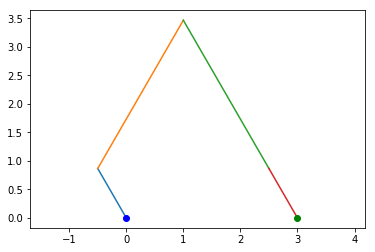

q
array([[-0.57357493],
       [ 0.8191531 ],
       [ 0.92642507],
       [ 3.41722931],
       [ 2.42642507],
       [ 0.8191531 ],
       [ 2.18165972],
       [ 2.18165972]])


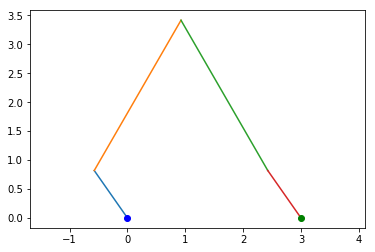

q
array([[-0.64278614],
       [ 0.76604568],
       [ 0.85721386],
       [ 3.36412189],
       [ 2.35721386],
       [ 0.76604568],
       [ 2.26892611],
       [ 2.26892611]])


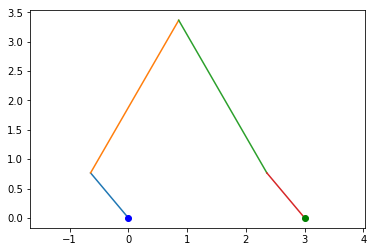

q
array([[-0.70710537],
       [ 0.70710819],
       [ 0.79289463],
       [ 3.3051844 ],
       [ 2.29289463],
       [ 0.70710819],
       [ 2.3561925 ],
       [ 2.3561925 ]])


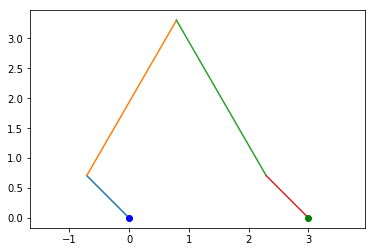

q
array([[-0.76604312],
       [ 0.64278919],
       [ 0.73395688],
       [ 3.2408654 ],
       [ 2.23395688],
       [ 0.64278919],
       [ 2.44345889],
       [ 2.44345889]])


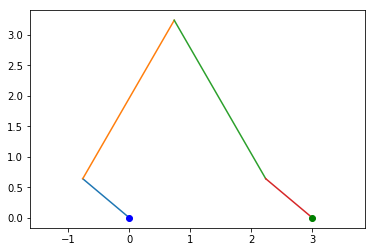

q
array([[-0.81915082],
       [ 0.57357819],
       [ 0.68084918],
       [ 3.1716544 ],
       [ 2.18084918],
       [ 0.57357819],
       [ 2.53072528],
       [ 2.53072528]])


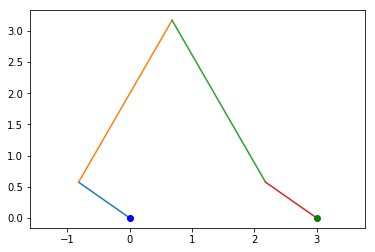

q
array([[-0.8660243 ],
       [ 0.50000192],
       [ 0.6339757 ],
       [ 3.09807813],
       [ 2.1339757 ],
       [ 0.50000192],
       [ 2.61799167],
       [ 2.61799167]])


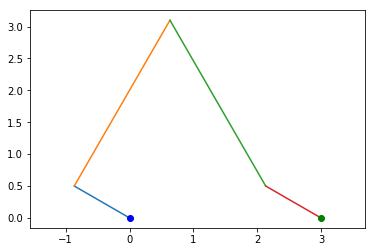

q
array([[-0.90630682],
       [ 0.42262033],
       [ 0.59369318],
       [ 3.02069654],
       [ 2.09369318],
       [ 0.42262033],
       [ 2.70525806],
       [ 2.70525806]])


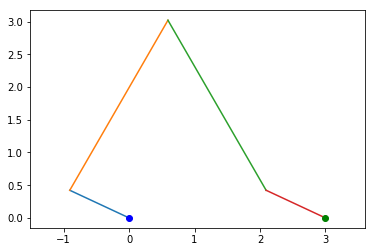

q
array([[-0.93969181],
       [ 0.34202236],
       [ 0.56030819],
       [ 2.94009857],
       [ 2.06030819],
       [ 0.34202236],
       [ 2.79252444],
       [ 2.79252444]])


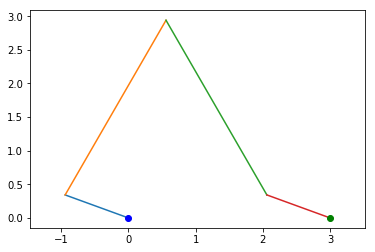

q
array([[-0.9659252 ],
       [ 0.25882139],
       [ 0.5340748 ],
       [ 2.85689761],
       [ 2.0340748 ],
       [ 0.25882139],
       [ 2.87979083],
       [ 2.87979083]])


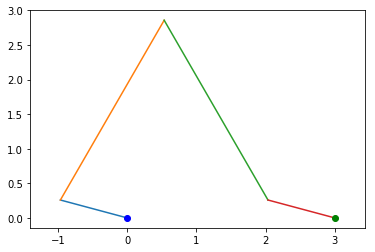

q
array([[-0.98480732],
       [ 0.17365065],
       [ 0.51519268],
       [ 2.77172686],
       [ 2.01519268],
       [ 0.17365065],
       [ 2.96705722],
       [ 2.96705722]])


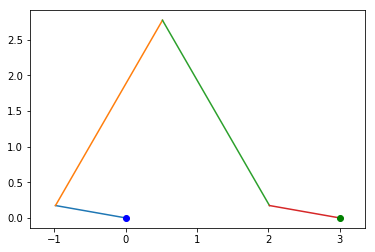

q
array([[-0.99619447],
       [ 0.08715831],
       [ 0.50380553],
       [ 2.68523452],
       [ 2.00380553],
       [ 0.08715831],
       [ 3.05432361],
       [ 3.05432361]])


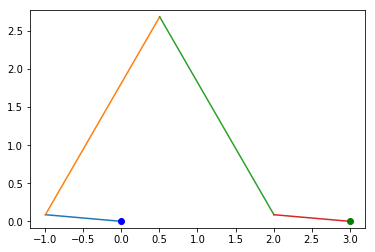

q
array([[-1.00000000e+00],
       [ 2.65358979e-06],
       [ 5.00000000e-01],
       [ 2.59807886e+00],
       [ 2.00000000e+00],
       [ 2.65358979e-06],
       [ 3.14159000e+00],
       [ 3.14159000e+00]])


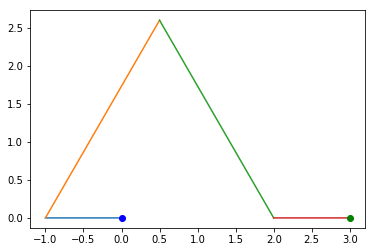

q
array([[-0.99619494],
       [-0.08715303],
       [ 0.50380506],
       [ 2.51092319],
       [ 2.00380506],
       [-0.08715303],
       [ 3.22885639],
       [ 3.22885639]])


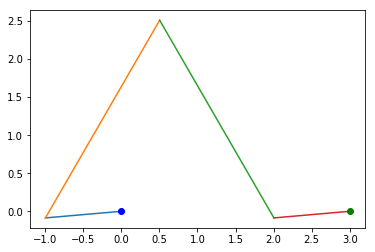

q
array([[-0.98480824],
       [-0.17364542],
       [ 0.51519176],
       [ 2.42443079],
       [ 2.01519176],
       [-0.17364542],
       [ 3.31612278],
       [ 3.31612278]])


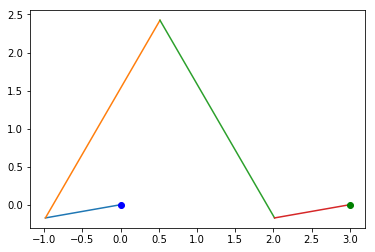

q
array([[-0.96592657],
       [-0.25881627],
       [ 0.53407343],
       [ 2.33925994],
       [ 2.03407343],
       [-0.25881627],
       [ 3.40338917],
       [ 3.40338917]])


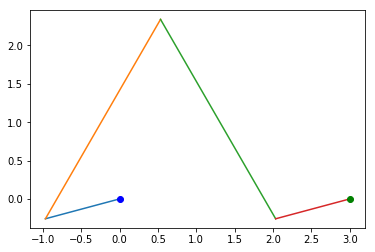

q
array([[-0.93969363],
       [-0.34201737],
       [ 0.56030637],
       [ 2.25605884],
       [ 2.06030637],
       [-0.34201737],
       [ 3.49065556],
       [ 3.49065556]])


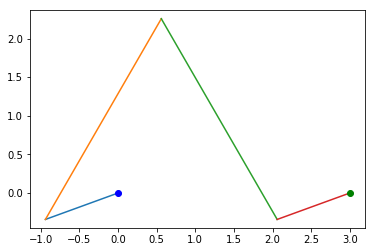

q
array([[-0.90630906],
       [-0.42261552],
       [ 0.59369094],
       [ 2.17546069],
       [ 2.09369094],
       [-0.42261552],
       [ 3.57792194],
       [ 3.57792194]])


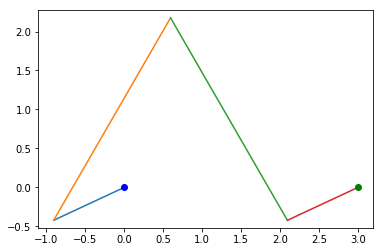

q
array([[-0.86602695],
       [-0.49999732],
       [ 0.63397305],
       [ 2.09807889],
       [ 2.13397305],
       [-0.49999732],
       [ 3.66518833],
       [ 3.66518833]])


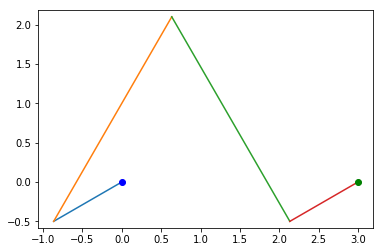

q
array([[-0.81915386],
       [-0.57357384],
       [ 0.68084614],
       [ 2.02450237],
       [ 2.18084614],
       [-0.57357384],
       [ 3.75245472],
       [ 3.75245472]])


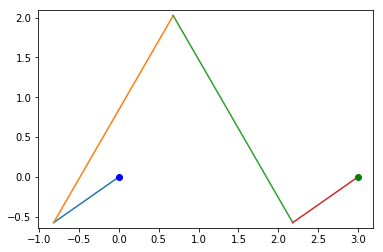

q
array([[-0.76604653],
       [-0.64278513],
       [ 0.73395347],
       [ 1.95529109],
       [ 2.23395347],
       [-0.64278513],
       [ 3.83972111],
       [ 3.83972111]])


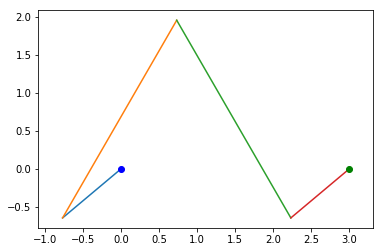

q
array([[-0.70710913],
       [-0.70710444],
       [ 0.79289087],
       [ 1.89097178],
       [ 2.29289087],
       [-0.70710444],
       [ 3.9269875 ],
       [ 3.9269875 ]])


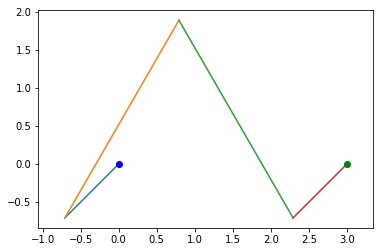

q
array([[-0.64279021],
       [-0.76604226],
       [ 0.85720979],
       [ 1.83203395],
       [ 2.35720979],
       [-0.76604226],
       [ 4.01425389],
       [ 4.01425389]])


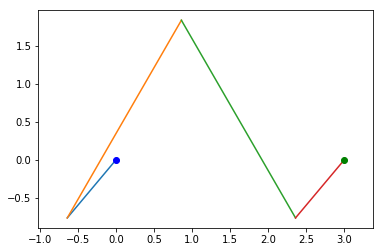

q
array([[-0.57357927],
       [-0.81915006],
       [ 0.92642073],
       [ 1.77892615],
       [ 2.42642073],
       [-0.81915006],
       [ 4.10152028],
       [ 4.10152028]])


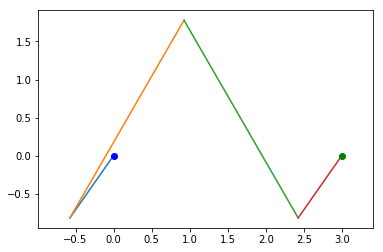

q
array([[-0.50000306],
       [-0.86602363],
       [ 0.99999694],
       [ 1.73205258],
       [ 2.49999694],
       [-0.86602363],
       [ 4.18878667],
       [ 4.18878667]])


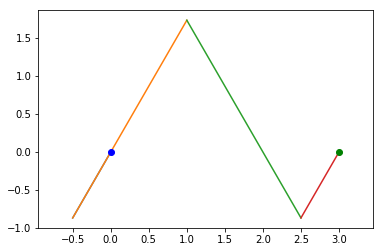

q
array([[-0.42262154],
       [-0.90630626],
       [ 1.07737846],
       [ 1.69176995],
       [ 2.57737846],
       [-0.90630626],
       [ 4.27605306],
       [ 4.27605306]])


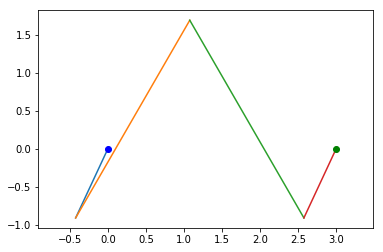

q
array([[-0.34202361],
       [-0.93969136],
       [ 1.15797639],
       [ 1.65838485],
       [ 2.65797639],
       [-0.93969136],
       [ 4.36331944],
       [ 4.36331944]])


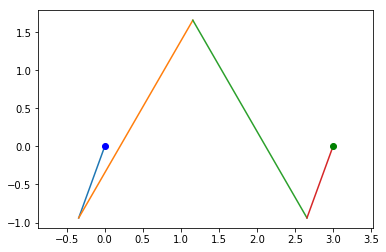

q
array([[-0.25882268],
       [-0.96592485],
       [ 1.24117732],
       [ 1.63215136],
       [ 2.74117732],
       [-0.96592485],
       [ 4.45058583],
       [ 4.45058583]])


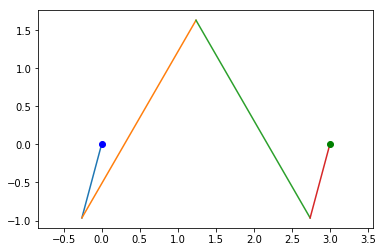

q
array([[-0.17365195],
       [-0.98480709],
       [ 1.32634805],
       [ 1.61326912],
       [ 2.82634805],
       [-0.98480709],
       [ 4.53785222],
       [ 4.53785222]])


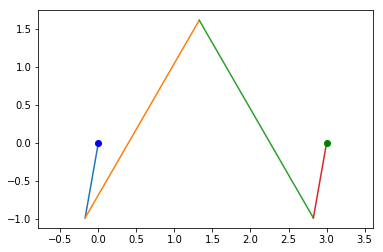

q
array([[-0.08715963],
       [-0.99619436],
       [ 1.41284037],
       [ 1.60188185],
       [ 2.91284037],
       [-0.99619436],
       [ 4.62511861],
       [ 4.62511861]])


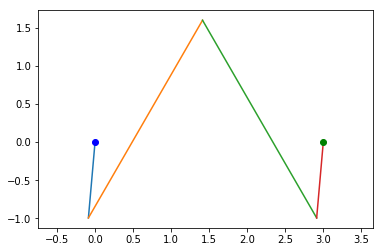

q
array([[-3.98038469e-06],
       [-1.00000000e+00],
       [ 1.49999602e+00],
       [ 1.59807621e+00],
       [ 2.99999602e+00],
       [-1.00000000e+00],
       [ 4.71238500e+00],
       [ 4.71238500e+00]])


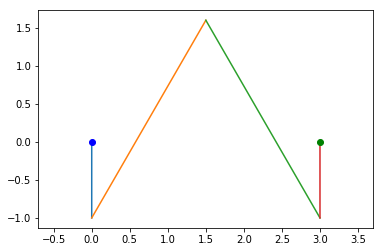

q
array([[ 0.0871517 ],
       [-0.99619505],
       [ 1.5871517 ],
       [ 1.60188116],
       [ 3.0871517 ],
       [-0.99619505],
       [ 4.79965139],
       [ 4.79965139]])


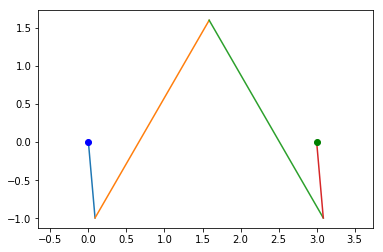

q
array([[ 0.17364411],
       [-0.98480847],
       [ 1.67364411],
       [ 1.61326774],
       [ 3.17364411],
       [-0.98480847],
       [ 4.88691778],
       [ 4.88691778]])


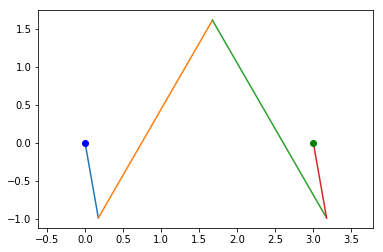

q
array([[ 0.25881499],
       [-0.96592691],
       [ 1.75881499],
       [ 1.6321493 ],
       [ 3.25881499],
       [-0.96592691],
       [ 4.97418417],
       [ 4.97418417]])


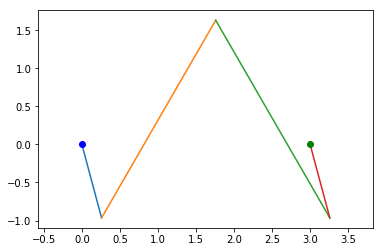

q
array([[ 0.34201613],
       [-0.93969408],
       [ 1.84201613],
       [ 1.65838213],
       [ 3.34201613],
       [-0.93969408],
       [ 5.06145056],
       [ 5.06145056]])


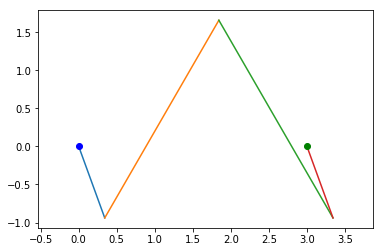

q
array([[ 0.42261432],
       [-0.90630962],
       [ 1.92261432],
       [ 1.69176659],
       [ 3.42261432],
       [-0.90630962],
       [ 5.14871694],
       [ 5.14871694]])


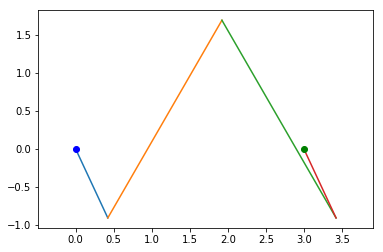

q
array([[ 0.49999617],
       [-0.86602762],
       [ 1.99999617],
       [ 1.7320486 ],
       [ 3.49999617],
       [-0.86602762],
       [ 5.23598333],
       [ 5.23598333]])


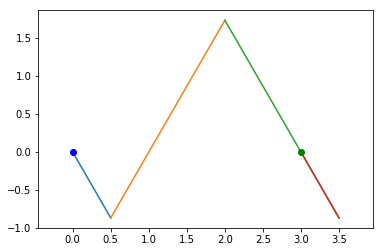

q
array([[ 0.57357275],
       [-0.81915462],
       [ 2.07357275],
       [ 1.77892159],
       [ 3.57357275],
       [-0.81915462],
       [ 5.32324972],
       [ 5.32324972]])


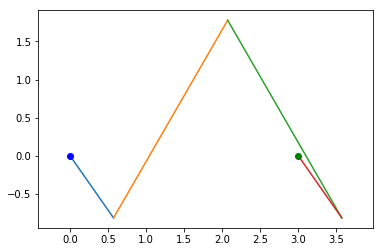

q
array([[ 0.64278411],
       [-0.76604738],
       [ 2.14278411],
       [ 1.83202883],
       [ 3.64278411],
       [-0.76604738],
       [ 5.41051611],
       [ 5.41051611]])


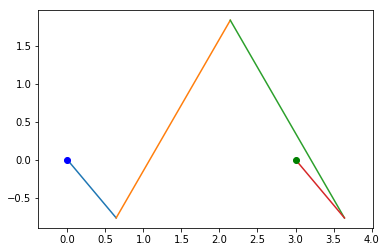

q
array([[ 0.7071035 ],
       [-0.70711006],
       [ 2.2071035 ],
       [ 1.89096615],
       [ 3.7071035 ],
       [-0.70711006],
       [ 5.4977825 ],
       [ 5.4977825 ]])


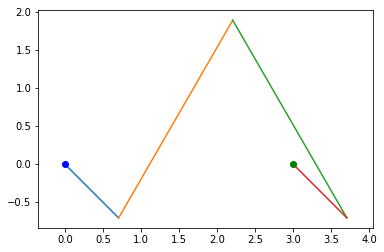

q
array([[ 0.76604141],
       [-0.64279122],
       [ 2.26604141],
       [ 1.95528499],
       [ 3.76604141],
       [-0.64279122],
       [ 5.58504889],
       [ 5.58504889]])


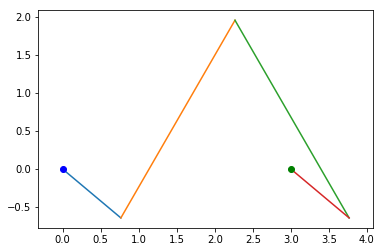

q
array([[ 0.8191493 ],
       [-0.57358036],
       [ 2.3191493 ],
       [ 2.02449585],
       [ 3.8191493 ],
       [-0.57358036],
       [ 5.67231528],
       [ 5.67231528]])


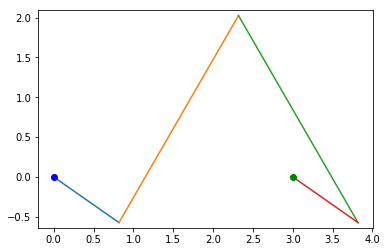

q
array([[ 0.86602297],
       [-0.50000421],
       [ 2.36602297],
       [ 2.098072  ],
       [ 3.86602297],
       [-0.50000421],
       [ 5.75958167],
       [ 5.75958167]])


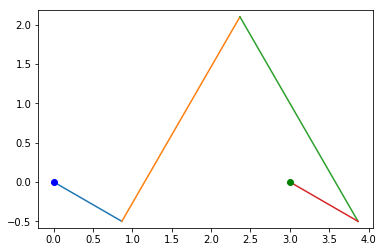

q
array([[ 0.9063057 ],
       [-0.42262274],
       [ 2.4063057 ],
       [ 2.17545347],
       [ 3.9063057 ],
       [-0.42262274],
       [ 5.84684806],
       [ 5.84684806]])


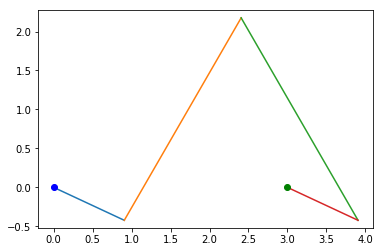

q
array([[ 0.93969091],
       [-0.34202485],
       [ 2.43969091],
       [ 2.25605136],
       [ 3.93969091],
       [-0.34202485],
       [ 5.93411444],
       [ 5.93411444]])


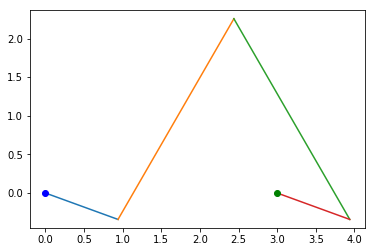

q
array([[ 0.96592451],
       [-0.25882396],
       [ 2.46592451],
       [ 2.33925225],
       [ 3.96592451],
       [-0.25882396],
       [ 6.02138083],
       [ 6.02138083]])


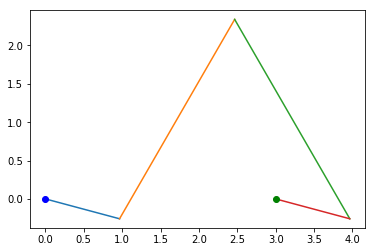

q
array([[ 0.98480686],
       [-0.17365326],
       [ 2.48480686],
       [ 2.42442295],
       [ 3.98480686],
       [-0.17365326],
       [ 6.10864722],
       [ 6.10864722]])


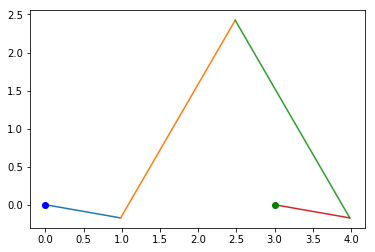

q
array([[ 0.99619424],
       [-0.08716096],
       [ 2.49619424],
       [ 2.51091526],
       [ 3.99619424],
       [-0.08716096],
       [ 6.19591361],
       [ 6.19591361]])


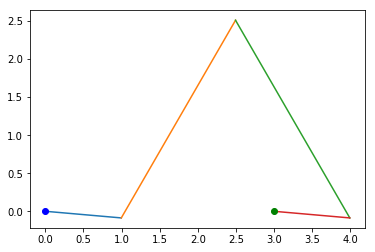

q
array([[ 1.00000000e+00],
       [-5.30717959e-06],
       [ 2.50000000e+00],
       [ 2.59807090e+00],
       [ 4.00000000e+00],
       [-5.30717959e-06],
       [ 6.28318000e+00],
       [ 6.28318000e+00]])


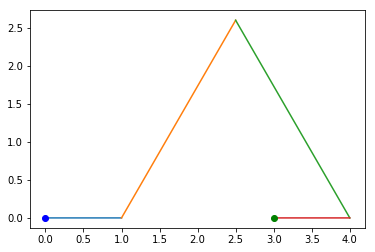

q
array([[0.99619517],
       [0.08715038],
       [2.49619517],
       [2.68522659],
       [3.99619517],
       [0.08715038],
       [6.37044639],
       [6.37044639]])


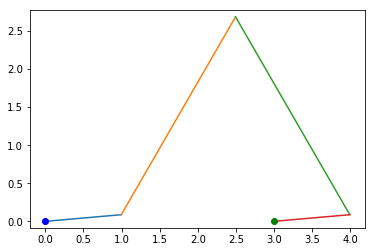

q
array([[0.9848087 ],
       [0.17364281],
       [2.4848087 ],
       [2.77171902],
       [3.9848087 ],
       [0.17364281],
       [6.45771278],
       [6.45771278]])


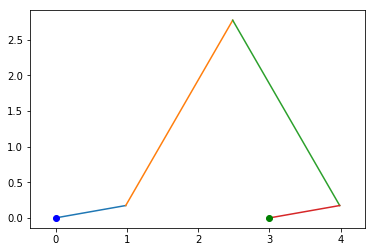

q
array([[0.96592726],
       [0.25881371],
       [2.46592726],
       [2.85688992],
       [3.96592726],
       [0.25881371],
       [6.54497917],
       [6.54497917]])


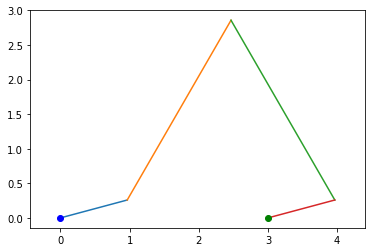

q
array([[0.93969454],
       [0.34201488],
       [2.43969454],
       [2.94009109],
       [3.93969454],
       [0.34201488],
       [6.63224556],
       [6.63224556]])


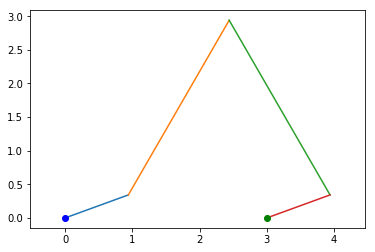

q
array([[0.90631019],
       [0.42261312],
       [2.40631019],
       [3.02068933],
       [3.90631019],
       [0.42261312],
       [6.71951194],
       [6.71951194]])


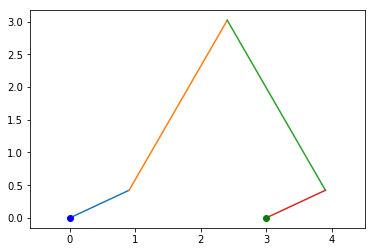

q
array([[0.86602828],
       [0.49999502],
       [2.36602828],
       [3.09807123],
       [3.86602828],
       [0.49999502],
       [6.80677833],
       [6.80677833]])


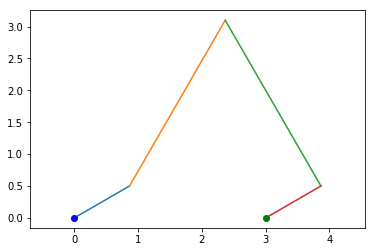

q
array([[0.81915538],
       [0.57357167],
       [2.31915538],
       [3.17164788],
       [3.81915538],
       [0.57357167],
       [6.89404472],
       [6.89404472]])


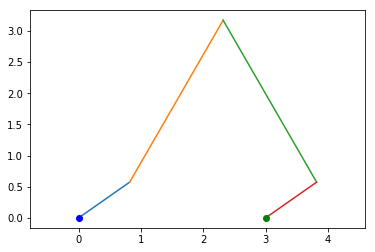

q
array([[0.76604823],
       [0.64278309],
       [2.26604823],
       [3.2408593 ],
       [3.76604823],
       [0.64278309],
       [6.98131111],
       [6.98131111]])


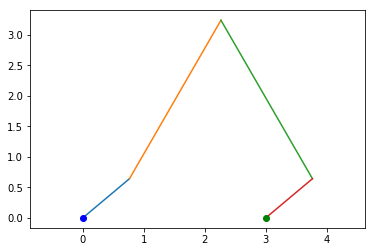

q
array([[0.707111  ],
       [0.70710256],
       [2.207111  ],
       [3.30517877],
       [3.707111  ],
       [0.70710256],
       [7.0685775 ],
       [7.0685775 ]])


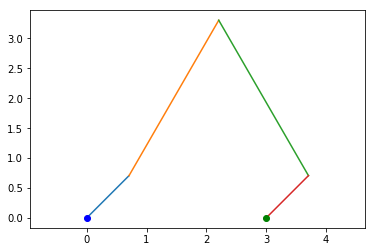

q
array([[0.64279224],
       [0.76604056],
       [2.14279224],
       [3.36411677],
       [3.64279224],
       [0.76604056],
       [7.15584389],
       [7.15584389]])


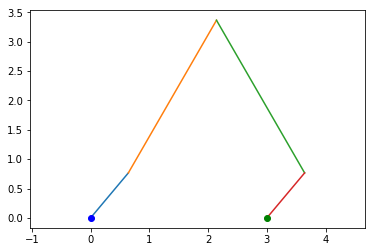

q
array([[0.57358145],
       [0.81914854],
       [2.07358145],
       [3.41722475],
       [3.57358145],
       [0.81914854],
       [7.24311028],
       [7.24311028]])


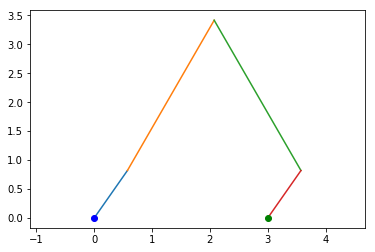

q
array([[0.50000536],
       [0.86602231],
       [2.00000536],
       [3.46409852],
       [3.50000536],
       [0.86602231],
       [7.33037667],
       [7.33037667]])


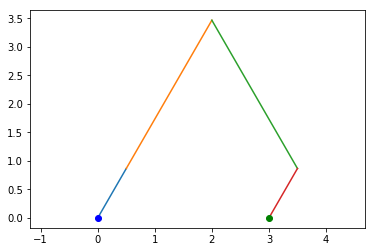

q
array([[0.42262394],
       [0.90630514],
       [1.92262394],
       [3.50438135],
       [3.42262394],
       [0.90630514],
       [7.41764306],
       [7.41764306]])


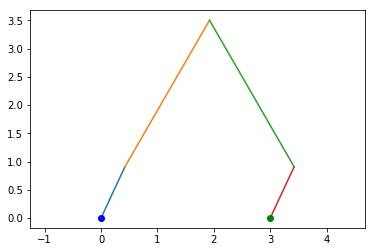

q
array([[0.3420261 ],
       [0.93969045],
       [1.8420261 ],
       [3.53776666],
       [3.3420261 ],
       [0.93969045],
       [7.50490944],
       [7.50490944]])


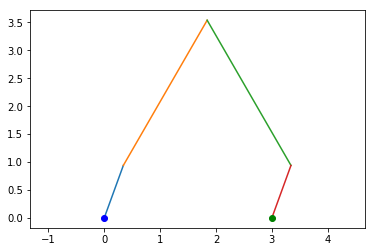

q
array([[0.25882524],
       [0.96592417],
       [1.75882524],
       [3.56400038],
       [3.25882524],
       [0.96592417],
       [7.59217583],
       [7.59217583]])


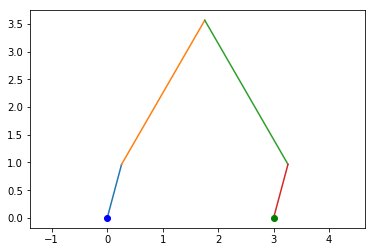

q
array([[0.17365457],
       [0.98480663],
       [1.67365457],
       [3.58288284],
       [3.17365457],
       [0.98480663],
       [7.67944222],
       [7.67944222]])


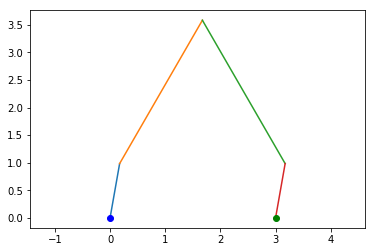

q
array([[0.08716228],
       [0.99619413],
       [1.58716228],
       [3.59427034],
       [3.08716228],
       [0.99619413],
       [7.76670861],
       [7.76670861]])


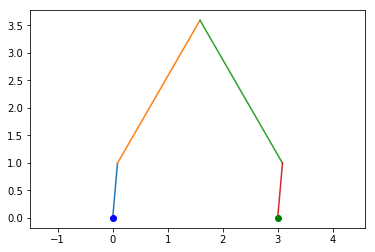

q
array([[6.63397448e-06],
       [1.00000000e+00],
       [1.50000663e+00],
       [3.59807621e+00],
       [3.00000663e+00],
       [1.00000000e+00],
       [7.85397500e+00],
       [7.85397500e+00]])


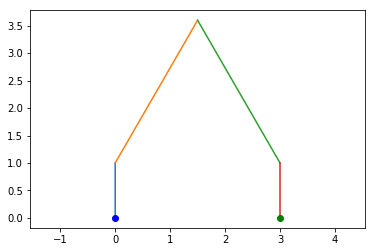

q
array([[-0.08714906],
       [ 0.99619528],
       [ 1.41285094],
       [ 3.59427149],
       [ 2.91285094],
       [ 0.99619528],
       [ 7.94124139],
       [ 7.94124139]])


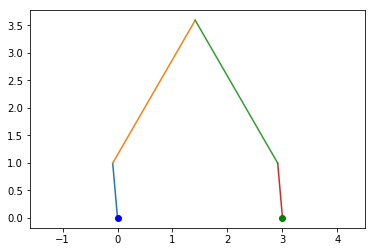

q
array([[-0.1736415 ],
       [ 0.98480893],
       [ 1.3263585 ],
       [ 3.58288514],
       [ 2.8263585 ],
       [ 0.98480893],
       [ 8.02850778],
       [ 8.02850778]])


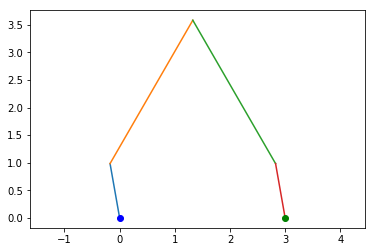

q
array([[-0.25881242],
       [ 0.9659276 ],
       [ 1.24118758],
       [ 3.56400381],
       [ 2.74118758],
       [ 0.9659276 ],
       [ 8.11577417],
       [ 8.11577417]])


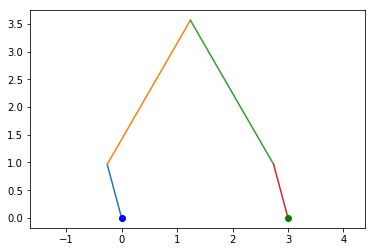

q
array([[-0.34201363],
       [ 0.93969499],
       [ 1.15798637],
       [ 3.5377712 ],
       [ 2.65798637],
       [ 0.93969499],
       [ 8.20304056],
       [ 8.20304056]])


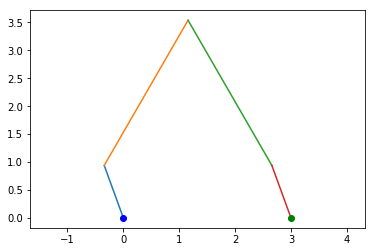

q
array([[-0.42261192],
       [ 0.90631075],
       [ 1.07738808],
       [ 3.50438696],
       [ 2.57738808],
       [ 0.90631075],
       [ 8.29030694],
       [ 8.29030694]])


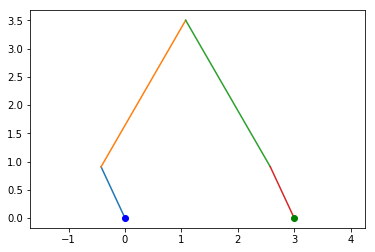

q
array([[-0.49999387],
       [ 0.86602894],
       [ 1.00000613],
       [ 3.46410515],
       [ 2.50000613],
       [ 0.86602894],
       [ 8.37757333],
       [ 8.37757333]])


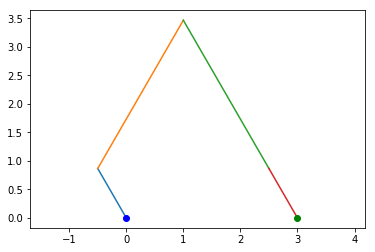

q
array([[-0.57357058],
       [ 0.81915615],
       [ 0.92642942],
       [ 3.41723236],
       [ 2.42642942],
       [ 0.81915615],
       [ 8.46483972],
       [ 8.46483972]])


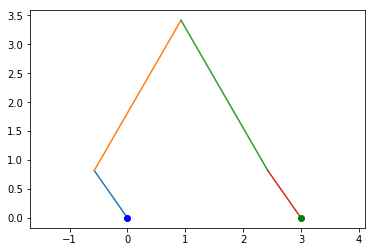

q
array([[-0.64278208],
       [ 0.76604909],
       [ 0.85721792],
       [ 3.3641253 ],
       [ 2.35721792],
       [ 0.76604909],
       [ 8.55210611],
       [ 8.55210611]])


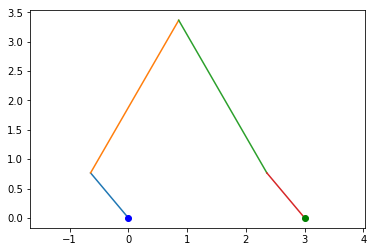

q
array([[-0.70710162],
       [ 0.70711194],
       [ 0.79289838],
       [ 3.30518815],
       [ 2.29289838],
       [ 0.70711194],
       [ 8.6393725 ],
       [ 8.6393725 ]])


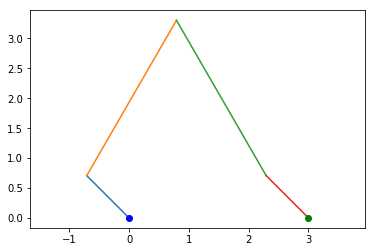

q
array([[-0.76603971],
       [ 0.64279326],
       [ 0.73396029],
       [ 3.24086947],
       [ 2.23396029],
       [ 0.64279326],
       [ 8.72663889],
       [ 8.72663889]])


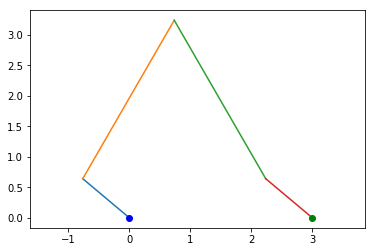

q
array([[-0.81914777],
       [ 0.57358253],
       [ 0.68085223],
       [ 3.17165875],
       [ 2.18085223],
       [ 0.57358253],
       [ 8.81390528],
       [ 8.81390528]])


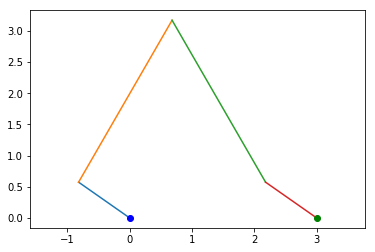

q
array([[-0.86602164],
       [ 0.50000651],
       [ 0.63397836],
       [ 3.09808272],
       [ 2.13397836],
       [ 0.50000651],
       [ 8.90117167],
       [ 8.90117167]])


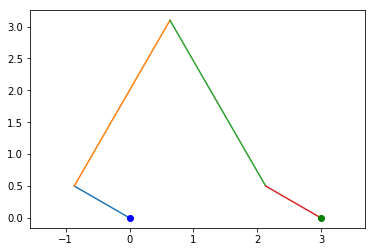

q
array([[-0.90630458],
       [ 0.42262514],
       [ 0.59369542],
       [ 3.02070135],
       [ 2.09369542],
       [ 0.42262514],
       [ 8.98843806],
       [ 8.98843806]])


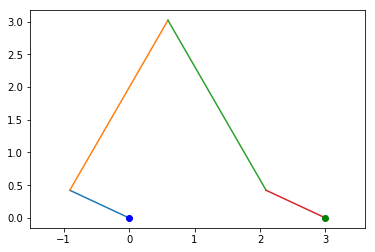

q
array([[-0.93969   ],
       [ 0.34202735],
       [ 0.56031   ],
       [ 2.94010356],
       [ 2.06031   ],
       [ 0.34202735],
       [ 9.07570444],
       [ 9.07570444]])


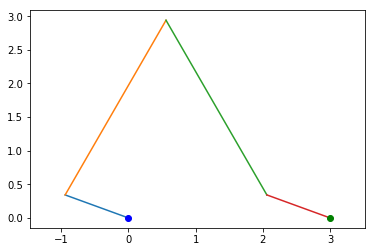

q
array([[-0.96592382],
       [ 0.25882652],
       [ 0.53407618],
       [ 2.85690273],
       [ 2.03407618],
       [ 0.25882652],
       [ 9.16297083],
       [ 9.16297083]])


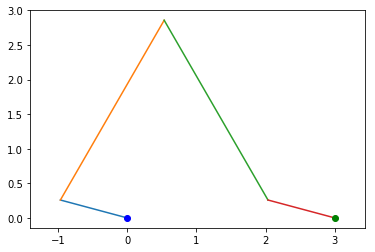

q
array([[-0.9848064 ],
       [ 0.17365587],
       [ 0.5151936 ],
       [ 2.77173208],
       [ 2.0151936 ],
       [ 0.17365587],
       [ 9.25023722],
       [ 9.25023722]])


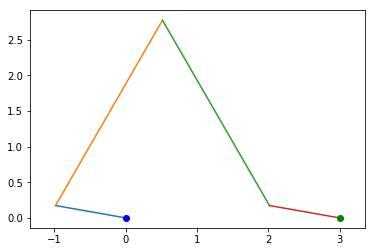

q
array([[-0.99619401],
       [ 0.0871636 ],
       [ 0.50380599],
       [ 2.68523981],
       [ 2.00380599],
       [ 0.0871636 ],
       [ 9.33750361],
       [ 9.33750361]])


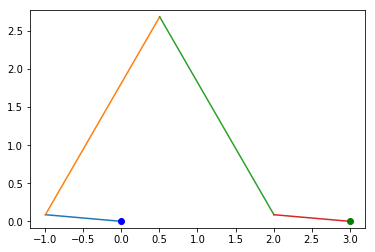

q
array([[-1.00000000e+00],
       [ 7.96076938e-06],
       [ 5.00000000e-01],
       [ 2.59808417e+00],
       [ 2.00000000e+00],
       [ 7.96076938e-06],
       [ 9.42477000e+00],
       [ 9.42477000e+00]])


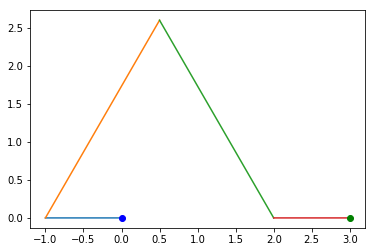

q
array([[-0.9961954 ],
       [-0.08714774],
       [ 0.5038046 ],
       [ 2.51092847],
       [ 2.0038046 ],
       [-0.08714774],
       [ 9.51203639],
       [ 9.51203639]])


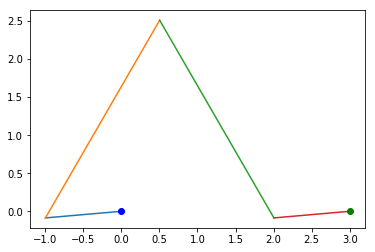

q
array([[-0.98480916],
       [-0.17364019],
       [ 0.51519084],
       [ 2.42443602],
       [ 2.01519084],
       [-0.17364019],
       [ 9.59930278],
       [ 9.59930278]])


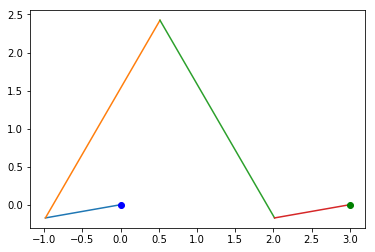

q
array([[-0.96592794],
       [-0.25881114],
       [ 0.53407206],
       [ 2.33926507],
       [ 2.03407206],
       [-0.25881114],
       [ 9.68656917],
       [ 9.68656917]])


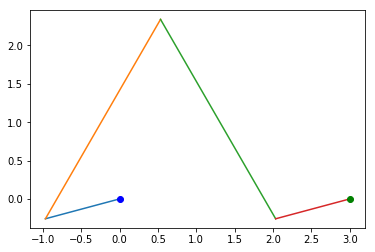

q
array([[-0.93969544],
       [-0.34201239],
       [ 0.56030456],
       [ 2.25606383],
       [ 2.06030456],
       [-0.34201239],
       [ 9.77383556],
       [ 9.77383556]])


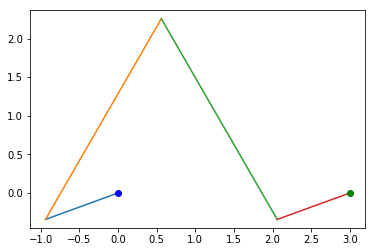

q
array([[-0.90631131],
       [-0.42261071],
       [ 0.59368869],
       [ 2.1754655 ],
       [ 2.09368869],
       [-0.42261071],
       [ 9.86110194],
       [ 9.86110194]])


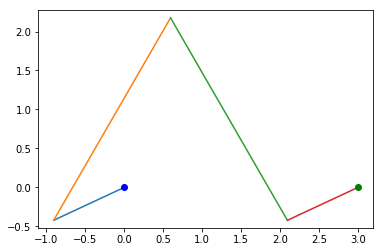

q
array([[-0.86602961],
       [-0.49999272],
       [ 0.63397039],
       [ 2.09808349],
       [ 2.13397039],
       [-0.49999272],
       [ 9.94836833],
       [ 9.94836833]])


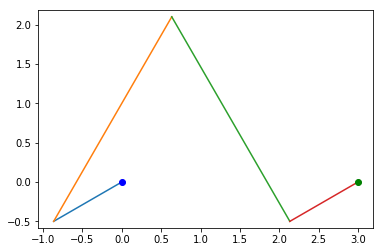

q
array([[-0.81915691],
       [-0.57356949],
       [ 0.68084309],
       [ 2.02450672],
       [ 2.18084309],
       [-0.57356949],
       [10.03563472],
       [10.03563472]])


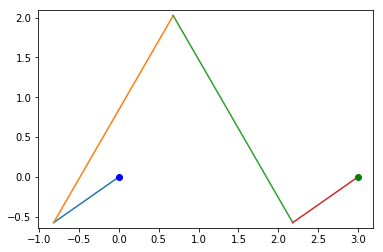

q
array([[-0.76604994],
       [-0.64278106],
       [ 0.73395006],
       [ 1.95529515],
       [ 2.23395006],
       [-0.64278106],
       [10.12290111],
       [10.12290111]])


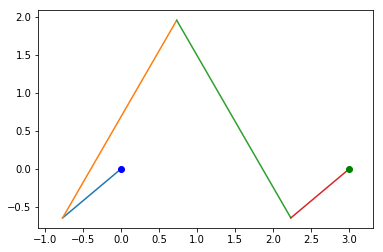

q
array([[-0.70711288],
       [-0.70710068],
       [ 0.79288712],
       [ 1.89097553],
       [ 2.29288712],
       [-0.70710068],
       [10.2101675 ],
       [10.2101675 ]])


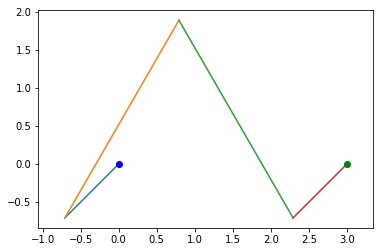

q
array([[-0.64279427],
       [-0.76603885],
       [ 0.85720573],
       [ 1.83203736],
       [ 2.35720573],
       [-0.76603885],
       [10.29743389],
       [10.29743389]])


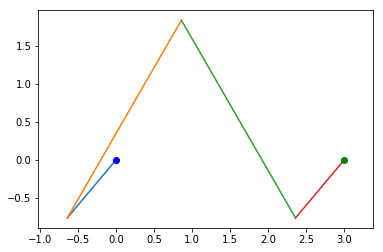

q
array([[-0.57358362],
       [-0.81914701],
       [ 0.92641638],
       [ 1.7789292 ],
       [ 2.42641638],
       [-0.81914701],
       [10.38470028],
       [10.38470028]])


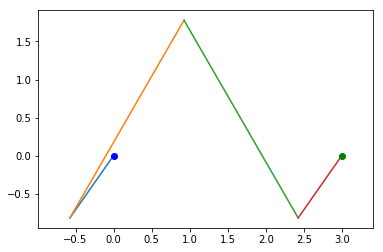

q
array([[-0.50000766],
       [-0.86602098],
       [ 0.99999234],
       [ 1.73205523],
       [ 2.49999234],
       [-0.86602098],
       [10.47196667],
       [10.47196667]])


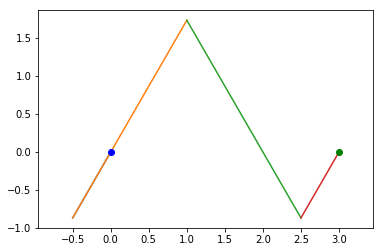

q
array([[-0.42262635],
       [-0.90630402],
       [ 1.07737365],
       [ 1.69177219],
       [ 2.57737365],
       [-0.90630402],
       [10.55923306],
       [10.55923306]])


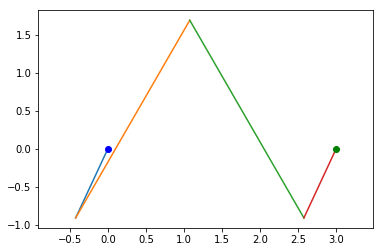

q
array([[-0.34202859],
       [-0.93968955],
       [ 1.15797141],
       [ 1.65838667],
       [ 2.65797141],
       [-0.93968955],
       [10.64649944],
       [10.64649944]])


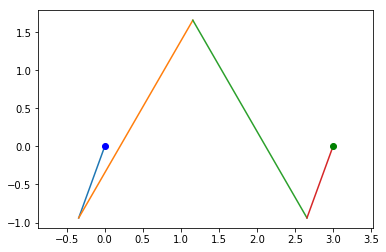

q
array([[-0.2588278 ],
       [-0.96592348],
       [ 1.2411722 ],
       [ 1.63215273],
       [ 2.7411722 ],
       [-0.96592348],
       [10.73376583],
       [10.73376583]])


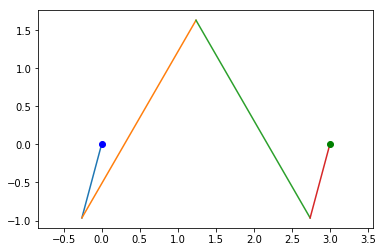

q
array([[-0.17365718],
       [-0.98480617],
       [ 1.32634282],
       [ 1.61327005],
       [ 2.82634282],
       [-0.98480617],
       [10.82103222],
       [10.82103222]])


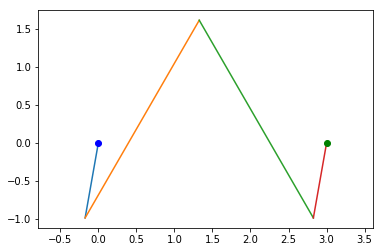

q
array([[-0.08716492],
       [-0.9961939 ],
       [ 1.41283508],
       [ 1.60188232],
       [ 2.91283508],
       [-0.9961939 ],
       [10.90829861],
       [10.90829861]])


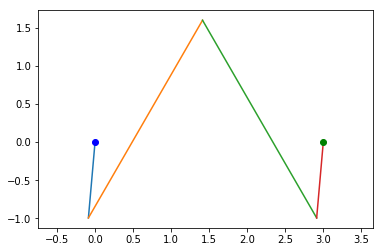

q
array([[-9.28756428e-06],
       [-1.00000000e+00],
       [ 1.49999071e+00],
       [ 1.59807621e+00],
       [ 2.99999071e+00],
       [-1.00000000e+00],
       [ 1.09955650e+01],
       [ 1.09955650e+01]])


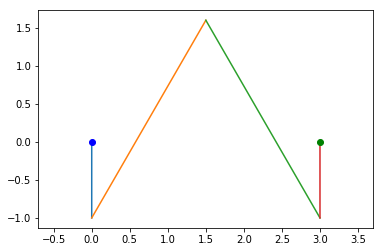

q
array([[ 0.08714642],
       [-0.99619551],
       [ 1.58714642],
       [ 1.6018807 ],
       [ 3.08714642],
       [-0.99619551],
       [11.08283139],
       [11.08283139]])


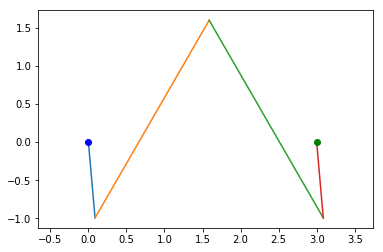

q
array([[ 0.17363889],
       [-0.98480939],
       [ 1.67363889],
       [ 1.61326682],
       [ 3.17363889],
       [-0.98480939],
       [11.17009778],
       [11.17009778]])


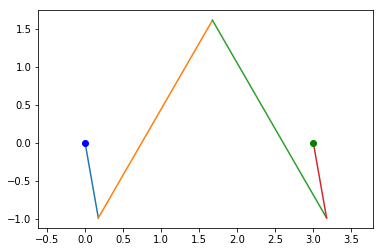

q
array([[ 0.25880986],
       [-0.96592829],
       [ 1.75880986],
       [ 1.63214792],
       [ 3.25880986],
       [-0.96592829],
       [11.25736417],
       [11.25736417]])


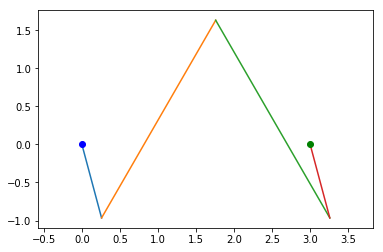

q
array([[ 0.34201114],
       [-0.9396959 ],
       [ 1.84201114],
       [ 1.65838031],
       [ 3.34201114],
       [-0.9396959 ],
       [11.34463056],
       [11.34463056]])


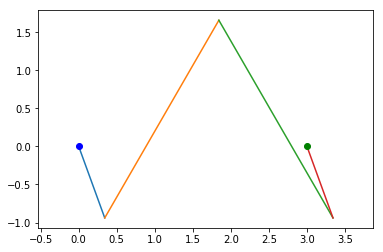

q
array([[ 0.42260951],
       [-0.90631187],
       [ 1.92260951],
       [ 1.69176434],
       [ 3.42260951],
       [-0.90631187],
       [11.43189694],
       [11.43189694]])


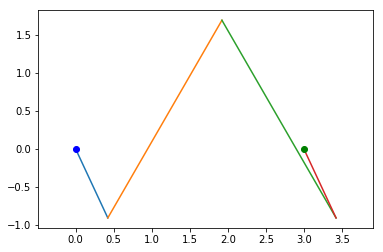

q
array([[ 0.49999157],
       [-0.86603027],
       [ 1.99999157],
       [ 1.73204594],
       [ 3.49999157],
       [-0.86603027],
       [11.51916333],
       [11.51916333]])


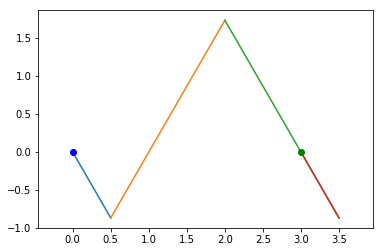

q
array([[ 0.57356841],
       [-0.81915767],
       [ 2.07356841],
       [ 1.77891854],
       [ 3.57356841],
       [-0.81915767],
       [11.60642972],
       [11.60642972]])


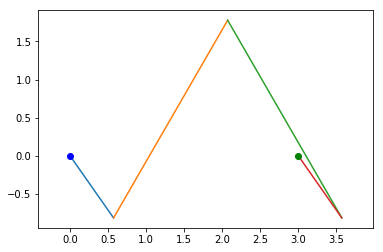

q
array([[ 0.64278004],
       [-0.76605079],
       [ 2.14278004],
       [ 1.83202542],
       [ 3.64278004],
       [-0.76605079],
       [11.69369611],
       [11.69369611]])


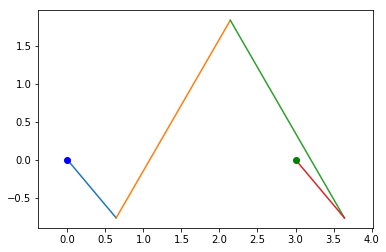

q
array([[ 0.70709974],
       [-0.70711382],
       [ 2.20709974],
       [ 1.89096239],
       [ 3.70709974],
       [-0.70711382],
       [11.7809625 ],
       [11.7809625 ]])


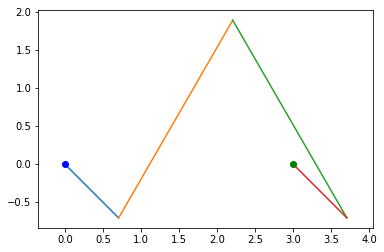

q
array([[ 0.766038  ],
       [-0.64279529],
       [ 2.266038  ],
       [ 1.95528092],
       [ 3.766038  ],
       [-0.64279529],
       [11.86822889],
       [11.86822889]])


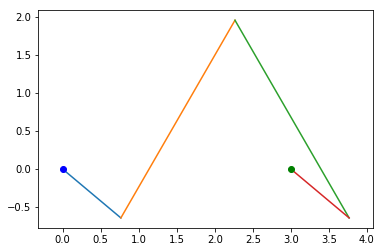

q
array([[ 0.81914625],
       [-0.57358471],
       [ 2.31914625],
       [ 2.0244915 ],
       [ 3.81914625],
       [-0.57358471],
       [11.95549528],
       [11.95549528]])


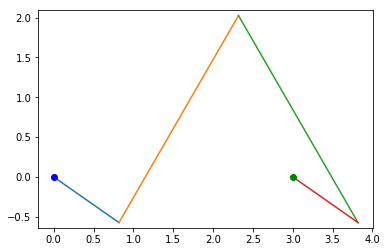

q
array([[ 0.86602032],
       [-0.50000881],
       [ 2.36602032],
       [ 2.0980674 ],
       [ 3.86602032],
       [-0.50000881],
       [12.04276167],
       [12.04276167]])


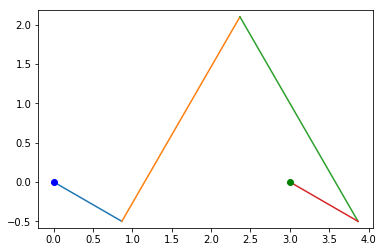

q
array([[ 0.90630346],
       [-0.42262755],
       [ 2.40630346],
       [ 2.17544866],
       [ 3.90630346],
       [-0.42262755],
       [12.13002806],
       [12.13002806]])


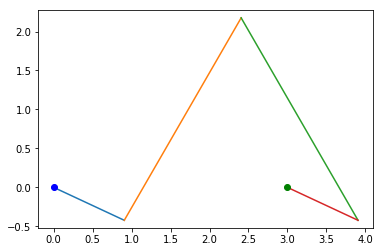

q
array([[ 0.93968909],
       [-0.34202984],
       [ 2.43968909],
       [ 2.25604637],
       [ 3.93968909],
       [-0.34202984],
       [12.21729444],
       [12.21729444]])


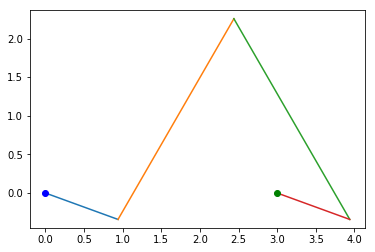

q
array([[ 0.96592314],
       [-0.25882908],
       [ 2.46592314],
       [ 2.33924713],
       [ 3.96592314],
       [-0.25882908],
       [12.30456083],
       [12.30456083]])


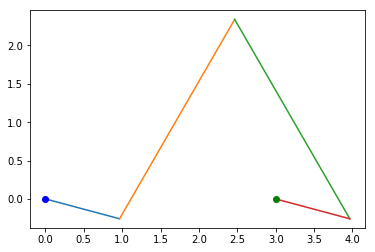

q
array([[ 0.98480594],
       [-0.17365849],
       [ 2.48480594],
       [ 2.42441773],
       [ 3.98480594],
       [-0.17365849],
       [12.39182722],
       [12.39182722]])


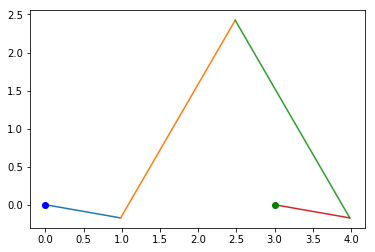

q
array([[ 0.99619378],
       [-0.08716624],
       [ 2.49619378],
       [ 2.51090997],
       [ 3.99619378],
       [-0.08716624],
       [12.47909361],
       [12.47909361]])


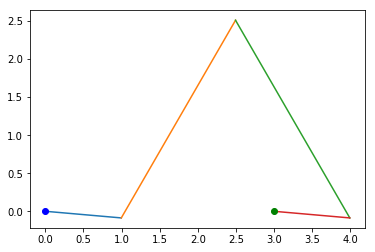

q
array([[ 1.00000000e+00],
       [-1.06143592e-05],
       [ 2.50000000e+00],
       [ 2.59806560e+00],
       [ 4.00000000e+00],
       [-1.06143592e-05],
       [ 1.25663600e+01],
       [ 1.25663600e+01]])


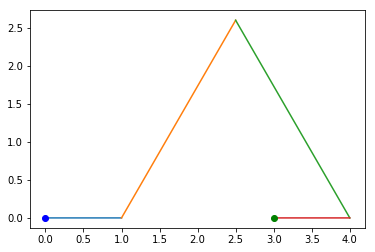

q
array([[ 0.99619563],
       [ 0.0871451 ],
       [ 2.49619563],
       [ 2.68522131],
       [ 3.99619563],
       [ 0.0871451 ],
       [12.65362639],
       [12.65362639]])


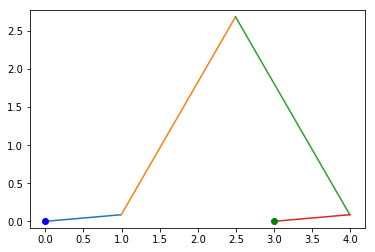

q
array([[ 0.98480962],
       [ 0.17363758],
       [ 2.48480962],
       [ 2.77171379],
       [ 3.98480962],
       [ 0.17363758],
       [12.74089278],
       [12.74089278]])


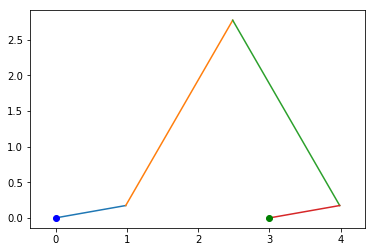

q
array([[ 0.96592863],
       [ 0.25880858],
       [ 2.46592863],
       [ 2.85688479],
       [ 3.96592863],
       [ 0.25880858],
       [12.82815917],
       [12.82815917]])


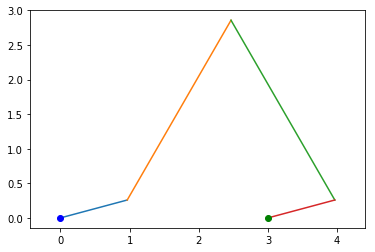

q
array([[ 0.93969635],
       [ 0.34200989],
       [ 2.43969635],
       [ 2.9400861 ],
       [ 3.93969635],
       [ 0.34200989],
       [12.91542556],
       [12.91542556]])


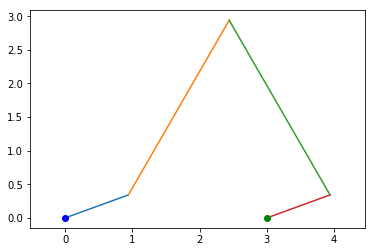

q
array([[ 0.90631243],
       [ 0.42260831],
       [ 2.40631243],
       [ 3.02068452],
       [ 3.90631243],
       [ 0.42260831],
       [13.00269194],
       [13.00269194]])


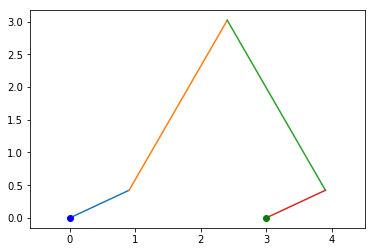

q
array([[ 0.86603093],
       [ 0.49999042],
       [ 2.36603093],
       [ 3.09806664],
       [ 3.86603093],
       [ 0.49999042],
       [13.08995833],
       [13.08995833]])


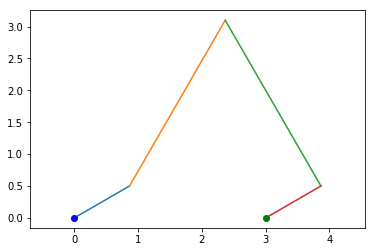

q
array([[ 0.81915843],
       [ 0.57356732],
       [ 2.31915843],
       [ 3.17164353],
       [ 3.81915843],
       [ 0.57356732],
       [13.17722472],
       [13.17722472]])


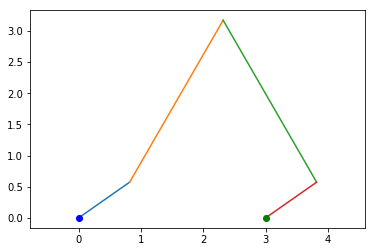

q
array([[ 0.76605164],
       [ 0.64277903],
       [ 2.26605164],
       [ 3.24085524],
       [ 3.76605164],
       [ 0.64277903],
       [13.26449111],
       [13.26449111]])


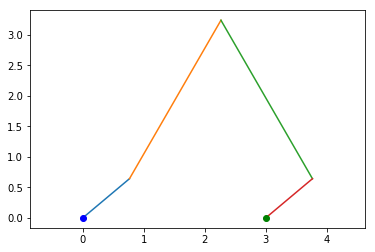

q
array([[ 0.70711476],
       [ 0.70709881],
       [ 2.20711476],
       [ 3.30517502],
       [ 3.70711476],
       [ 0.70709881],
       [13.3517575 ],
       [13.3517575 ]])


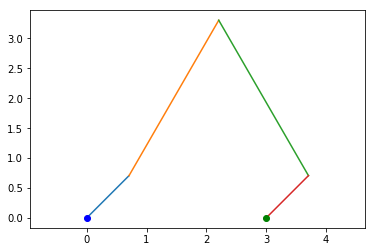

q
array([[ 0.64279631],
       [ 0.76603715],
       [ 2.14279631],
       [ 3.36411336],
       [ 3.64279631],
       [ 0.76603715],
       [13.43902389],
       [13.43902389]])


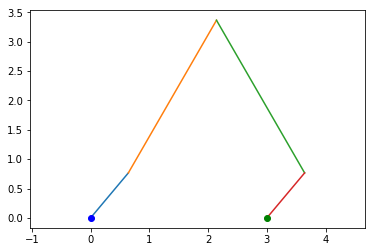

q
array([[ 0.5735858 ],
       [ 0.81914549],
       [ 2.0735858 ],
       [ 3.4172217 ],
       [ 3.5735858 ],
       [ 0.81914549],
       [13.52629028],
       [13.52629028]])


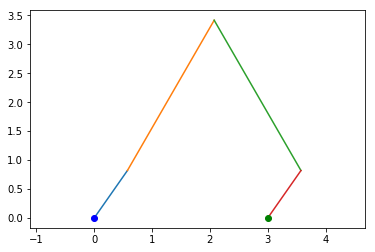

q
array([[ 0.50000996],
       [ 0.86601965],
       [ 2.00000996],
       [ 3.46409587],
       [ 3.50000996],
       [ 0.86601965],
       [13.61355667],
       [13.61355667]])


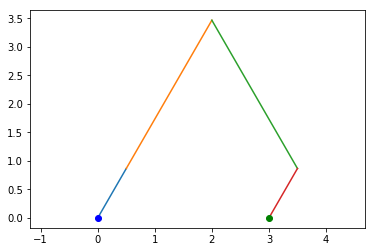

q
array([[ 0.42262875],
       [ 0.9063029 ],
       [ 1.92262875],
       [ 3.50437911],
       [ 3.42262875],
       [ 0.9063029 ],
       [13.70082306],
       [13.70082306]])


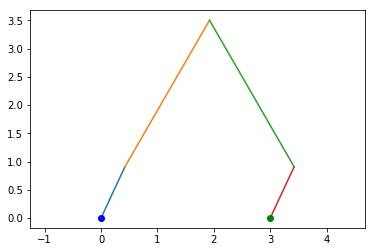

q
array([[ 0.34203109],
       [ 0.93968864],
       [ 1.84203109],
       [ 3.53776485],
       [ 3.34203109],
       [ 0.93968864],
       [13.78808944],
       [13.78808944]])


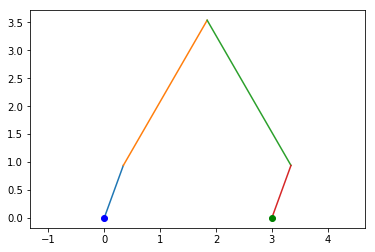

q
array([[ 0.25883037],
       [ 0.96592279],
       [ 1.75883037],
       [ 3.563999  ],
       [ 3.25883037],
       [ 0.96592279],
       [13.87535583],
       [13.87535583]])


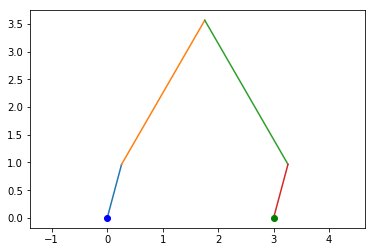

q
array([[ 0.17365979],
       [ 0.9848057 ],
       [ 1.67365979],
       [ 3.58288192],
       [ 3.17365979],
       [ 0.9848057 ],
       [13.96262222],
       [13.96262222]])


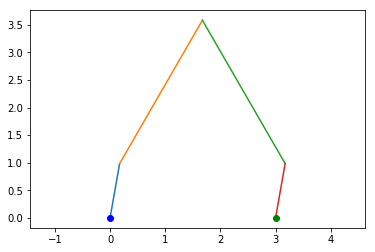

q
array([[ 0.08716757],
       [ 0.99619366],
       [ 1.58716757],
       [ 3.59426988],
       [ 3.08716757],
       [ 0.99619366],
       [14.04988861],
       [14.04988861]])


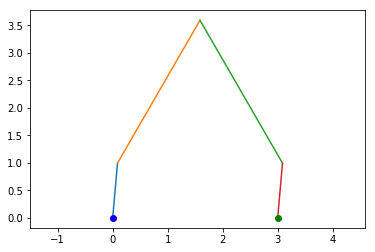

q
array([[1.19411541e-05],
       [1.00000000e+00],
       [1.50001194e+00],
       [3.59807621e+00],
       [3.00001194e+00],
       [1.00000000e+00],
       [1.41371550e+01],
       [1.41371550e+01]])


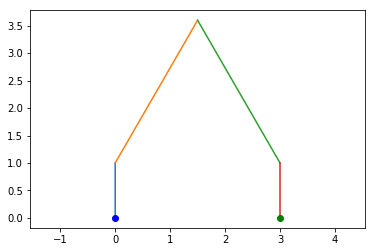

q
array([[-0.08714377],
       [ 0.99619575],
       [ 1.41285623],
       [ 3.59427196],
       [ 2.91285623],
       [ 0.99619575],
       [14.22442139],
       [14.22442139]])


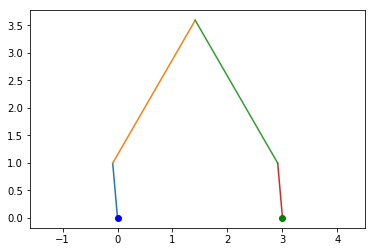

q
array([[-0.17363627],
       [ 0.98480985],
       [ 1.32636373],
       [ 3.58288606],
       [ 2.82636373],
       [ 0.98480985],
       [14.31168778],
       [14.31168778]])


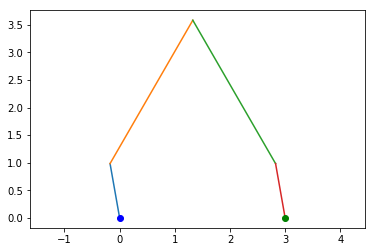

q
array([[-0.2588073 ],
       [ 0.96592897],
       [ 1.2411927 ],
       [ 3.56400519],
       [ 2.7411927 ],
       [ 0.96592897],
       [14.39895417],
       [14.39895417]])


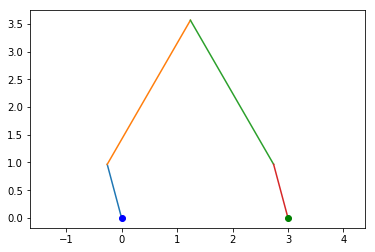

q
array([[-0.34200865],
       [ 0.93969681],
       [ 1.15799135],
       [ 3.53777302],
       [ 2.65799135],
       [ 0.93969681],
       [14.48622056],
       [14.48622056]])


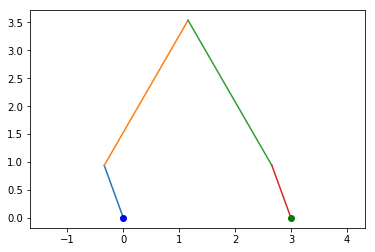

q
array([[-0.42260711],
       [ 0.90631299],
       [ 1.07739289],
       [ 3.5043892 ],
       [ 2.57739289],
       [ 0.90631299],
       [14.57348694],
       [14.57348694]])


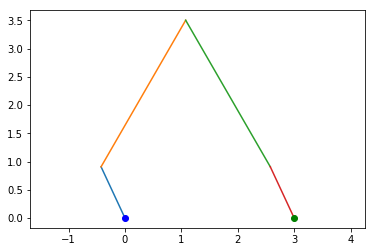

q
array([[-0.49998928],
       [ 0.8660316 ],
       [ 1.00001072],
       [ 3.46410781],
       [ 2.50001072],
       [ 0.8660316 ],
       [14.66075333],
       [14.66075333]])


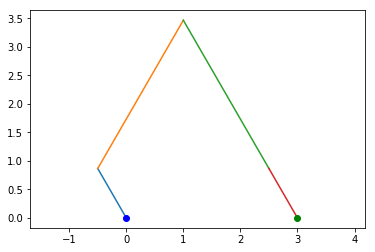

q
array([[-0.57356623],
       [ 0.81915919],
       [ 0.92643377],
       [ 3.4172354 ],
       [ 2.42643377],
       [ 0.81915919],
       [14.74801972],
       [14.74801972]])


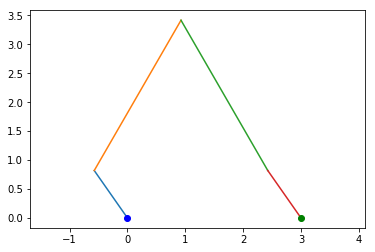

q
array([[-0.64277801],
       [ 0.7660525 ],
       [ 0.85722199],
       [ 3.36412871],
       [ 2.35722199],
       [ 0.7660525 ],
       [14.83528611],
       [14.83528611]])


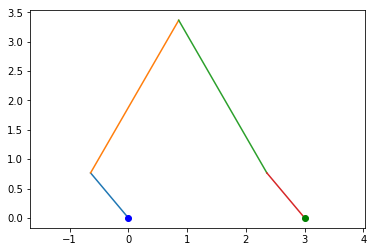

q
array([[-0.70709787],
       [ 0.70711569],
       [ 0.79290213],
       [ 3.30519191],
       [ 2.29290213],
       [ 0.70711569],
       [14.9225525 ],
       [14.9225525 ]])


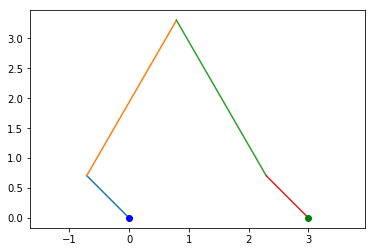

q
array([[-0.76603629],
       [ 0.64279732],
       [ 0.73396371],
       [ 3.24087353],
       [ 2.23396371],
       [ 0.64279732],
       [15.00981889],
       [15.00981889]])


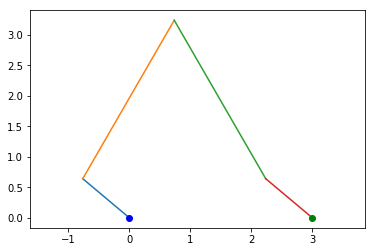

q
array([[-0.81914473],
       [ 0.57358688],
       [ 0.68085527],
       [ 3.17166309],
       [ 2.18085527],
       [ 0.57358688],
       [15.09708528],
       [15.09708528]])


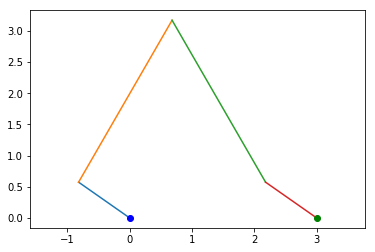

q
array([[-0.86601899],
       [ 0.50001111],
       [ 0.63398101],
       [ 3.09808732],
       [ 2.13398101],
       [ 0.50001111],
       [15.18435167],
       [15.18435167]])


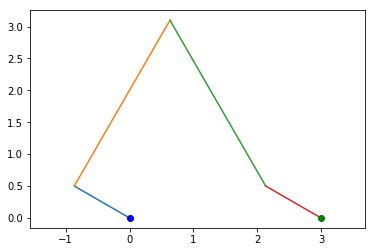

q
array([[-0.90630234],
       [ 0.42262995],
       [ 0.59369766],
       [ 3.02070616],
       [ 2.09369766],
       [ 0.42262995],
       [15.27161806],
       [15.27161806]])


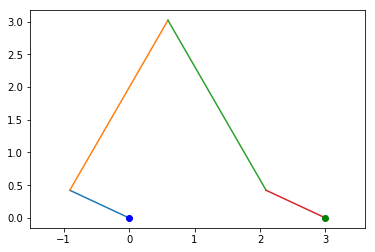

q
array([[-0.93968818],
       [ 0.34203233],
       [ 0.56031182],
       [ 2.94010855],
       [ 2.06031182],
       [ 0.34203233],
       [15.35888444],
       [15.35888444]])


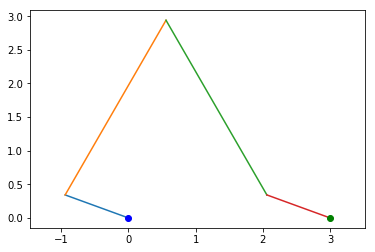

q
array([[-0.96592245],
       [ 0.25883165],
       [ 0.53407755],
       [ 2.85690786],
       [ 2.03407755],
       [ 0.25883165],
       [15.44615083],
       [15.44615083]])


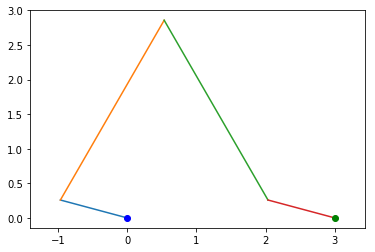

q
array([[-0.98480547],
       [ 0.1736611 ],
       [ 0.51519453],
       [ 2.77173731],
       [ 2.01519453],
       [ 0.1736611 ],
       [15.53341722],
       [15.53341722]])


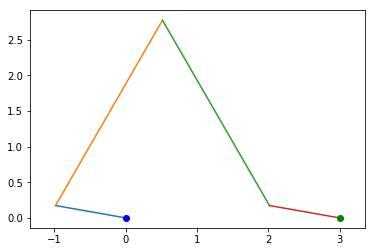

q
array([[-0.99619355],
       [ 0.08716889],
       [ 0.50380645],
       [ 2.6852451 ],
       [ 2.00380645],
       [ 0.08716889],
       [15.62068361],
       [15.62068361]])


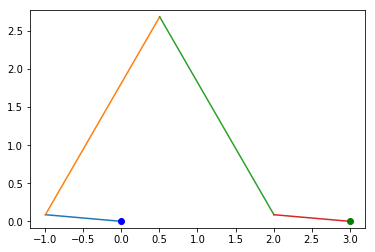

q
array([[-1.00000000e+00],
       [ 1.32679490e-05],
       [ 5.00000000e-01],
       [ 2.59808948e+00],
       [ 2.00000000e+00],
       [ 1.32679490e-05],
       [ 1.57079500e+01],
       [ 1.57079500e+01]])


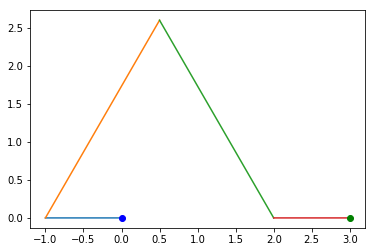

q
array([[-0.99619586],
       [-0.08714245],
       [ 0.50380414],
       [ 2.51093376],
       [ 2.00380414],
       [-0.08714245],
       [15.79521639],
       [15.79521639]])


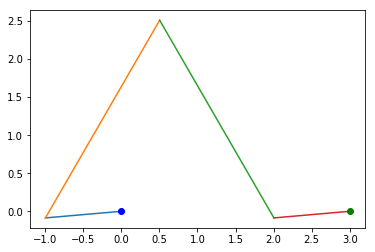

q
array([[-0.98481008],
       [-0.17363497],
       [ 0.51518992],
       [ 2.42444125],
       [ 2.01518992],
       [-0.17363497],
       [15.88248278],
       [15.88248278]])


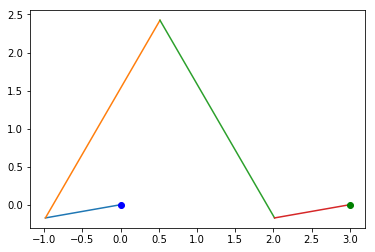

q
array([[-0.96592932],
       [-0.25880602],
       [ 0.53407068],
       [ 2.3392702 ],
       [ 2.03407068],
       [-0.25880602],
       [15.96974917],
       [15.96974917]])


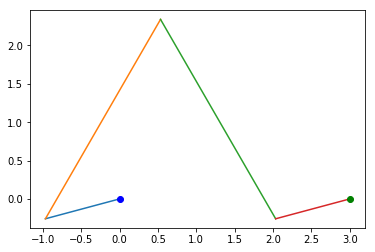

q
array([[-0.93969726],
       [-0.3420074 ],
       [ 0.56030274],
       [ 2.25606881],
       [ 2.06030274],
       [-0.3420074 ],
       [16.05701556],
       [16.05701556]])


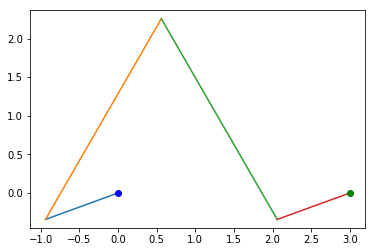

q
array([[-0.90631355],
       [-0.4226059 ],
       [ 0.59368645],
       [ 2.17547031],
       [ 2.09368645],
       [-0.4226059 ],
       [16.14428194],
       [16.14428194]])


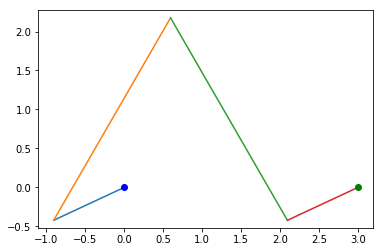

q
array([[-0.86603226],
       [-0.49998813],
       [ 0.63396774],
       [ 2.09808808],
       [ 2.13396774],
       [-0.49998813],
       [16.23154833],
       [16.23154833]])


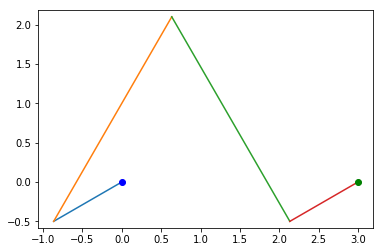

q
array([[-0.81915995],
       [-0.57356515],
       [ 0.68084005],
       [ 2.02451107],
       [ 2.18084005],
       [-0.57356515],
       [16.31881472],
       [16.31881472]])


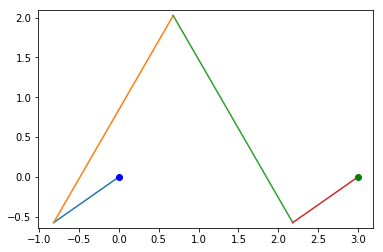

q
array([[-0.76605335],
       [-0.64277699],
       [ 0.73394665],
       [ 1.95529922],
       [ 2.23394665],
       [-0.64277699],
       [16.40608111],
       [16.40608111]])


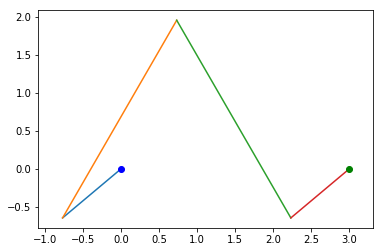

q
array([[-0.70711663],
       [-0.70709693],
       [ 0.79288337],
       [ 1.89097928],
       [ 2.29288337],
       [-0.70709693],
       [16.4933475 ],
       [16.4933475 ]])


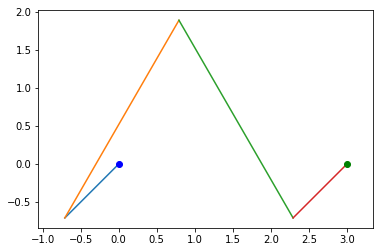

q
array([[-0.64279834],
       [-0.76603544],
       [ 0.85720166],
       [ 1.83204077],
       [ 2.35720166],
       [-0.76603544],
       [16.58061389],
       [16.58061389]])


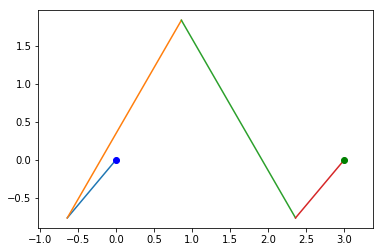

q
array([[-0.57358797],
       [-0.81914397],
       [ 0.92641203],
       [ 1.77893224],
       [ 2.42641203],
       [-0.81914397],
       [16.66788028],
       [16.66788028]])


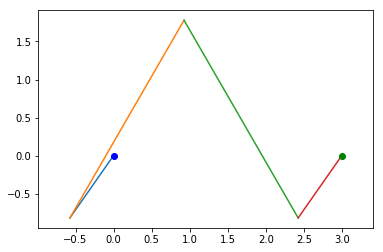

q
array([[-0.50001226],
       [-0.86601833],
       [ 0.99998774],
       [ 1.73205788],
       [ 2.49998774],
       [-0.86601833],
       [16.75514667],
       [16.75514667]])


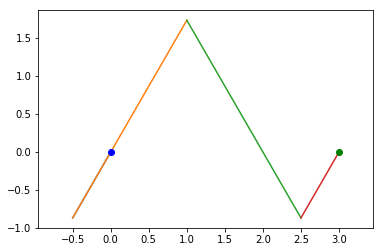

q
array([[-0.42263116],
       [-0.90630177],
       [ 1.07736884],
       [ 1.69177444],
       [ 2.57736884],
       [-0.90630177],
       [16.84241306],
       [16.84241306]])


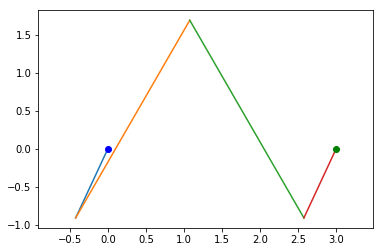

q
array([[-0.34203358],
       [-0.93968773],
       [ 1.15796642],
       [ 1.65838848],
       [ 2.65796642],
       [-0.93968773],
       [16.92967944],
       [16.92967944]])


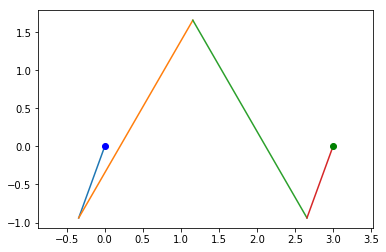

q
array([[-0.25883293],
       [-0.96592211],
       [ 1.24116707],
       [ 1.63215411],
       [ 2.74116707],
       [-0.96592211],
       [17.01694583],
       [17.01694583]])


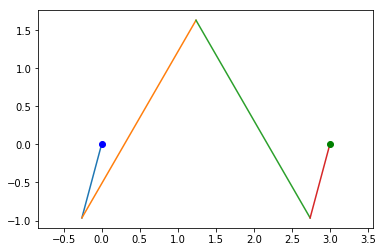

q
array([[-0.17366241],
       [-0.98480524],
       [ 1.32633759],
       [ 1.61327097],
       [ 2.82633759],
       [-0.98480524],
       [17.10421222],
       [17.10421222]])


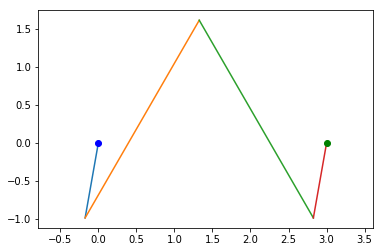

q
array([[-0.08717021],
       [-0.99619343],
       [ 1.41282979],
       [ 1.60188278],
       [ 2.91282979],
       [-0.99619343],
       [17.19147861],
       [17.19147861]])


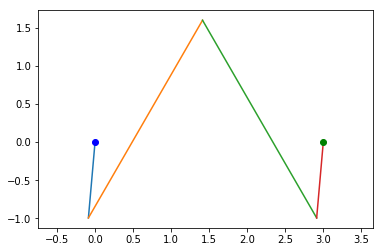

q
array([[-1.45947439e-05],
       [-1.00000000e+00],
       [ 1.49998541e+00],
       [ 1.59807621e+00],
       [ 2.99998541e+00],
       [-1.00000000e+00],
       [ 1.72787450e+01],
       [ 1.72787450e+01]])


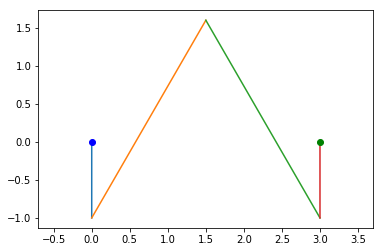

q
array([[ 0.08714113],
       [-0.99619598],
       [ 1.58714113],
       [ 1.60188023],
       [ 3.08714113],
       [-0.99619598],
       [17.36601139],
       [17.36601139]])


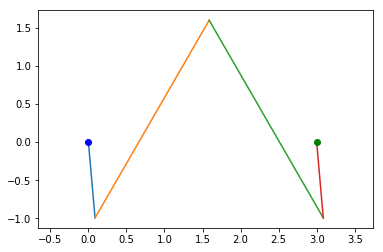

In [3]:
i=0

while (i<200):
      
    q[6] = i*5*3.14159/180
    q[7] = i*5*3.14159/180
    q = resuelve_prob_posicion(q,meca)
    print ("q")
    pprint.pprint (q)
    dibuja_mecanismo(q,meca) 
    sleep(0.2)
    i= i+1

